Перед тем, как отркыть файл, я в MS EXcel изменил немного таблицу: 
1)переименовал существующий столбец "Birthday" на "Birthday1";
2)исправил неккоректно введеные годы "Birthday1";
4)создал новый столбец "Birthday", который принимает значения годов из "Birthday1", так как, при открытии файла в юпитере, pandas сама присваивала столбцу "Birthday" время 00:00:00
5)присвоил "Birthday" только годы из "Birthday1"
6)присвоил значения "Year" в "Birthday" для тех столбцов, где "Birthday1" были пустыми
7)в "Birthday"  первая дата была неправильно введена, так как значения в "Birthday" и в "Year" не совпадали, а также этот год был очень подозрительным, поэтому я его тоже исправил

In [1]:
import pandas as pd
data = pd.read_excel('Arvand.xlsx')
data

,KOD,Birthday,Birthday1,Year,Married,Gender,Nationality,Educ,FamilySize,BusExper,...,"Залог (группа-поручительство, категория 1 - недвижимость, категория 2-движимое имущество, категория 3-поручительство, категория 4 - без залога)",Капитал,Актив,Обязательства,Дни просрочки,Максимальные дни просрочки,Количество просрочек,Этап кредитования (который раз получает кредит,Валовая прибыль,Чистая прибыль
0,70081389,1975,1925-02-05,1975.0,Оиладор,Мужской,Узбек,Оли,3,15,...,Категория 2,2820.0,3000.0,0.0,46,23,4,1,0.0,180.0
1,70068103,1933,1933-03-27,NaN,Оиладор,Мужской,Точик,Миёна,3,NaN,...,Категория 4,0.0,0.0,0.0,11,5,5,1,0.0,0.0
2,70084699,1933,1933-03-27,NaN,Оиладор,Мужской,Точик,Миёна,3,NaN,...,Категория 3,0.0,0.0,0.0,0,0,0,2,0.0,1648.0
3,70067500,1933,1933-11-27,NaN,Беоила,Женский,Точик,Миёнаи махсус,Нет инфо,3,...,Категория 2,5050.0,5200.0,0.0,0,0,0,1,0.0,150.0
4,1047372,1938,1938-04-23,1938.0,Оиладор,Мужской,Узбек,Миёна,1,5,...,Категория 4,6777.0,7600.0,543.0,15,14,2,2,0.0,280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85417,210106137,1984,NaT,1984.0,Оиладор,Мужской,Узбек,Миёна,Нет инфо,10,...,Категория 2,0.0,0.0,0.0,53,14,6,1,2500.0,2683.0
85418,210107051,1990,NaT,1990.0,Беоила,Мужской,Узбек,Миёна,1,NaN,...,Категория 2,5000.0,5000.0,0.0,0,0,0,1,7360.0,6536.0
85419,210108260,1974,NaT,1974.0,Оиладор,Женский,Узбек,Оли,3,NaN,...,Категория 2,51600.0,96400.0,44800.0,0,0,0,1,5630.0,6043.0
85420,210108426,1985,NaT,1985.0,Оиладор,Мужской,Узбек,Миёна,2,5,...,Категория 3,12600.0,12600.0,0.0,2,1,2,1,0.0,780.0


# 1)Предобработка данных

### Удаление ненужных ячеек

In [2]:
#создаем новый датафрейм, для того чтобы не изменять data
data1=data.copy()

In [3]:
# Создаем новый столбец 'Combined_Birthday'
data1['Combined_Birthday'] = pd.NaT  # Инициализируем пустыми значениями

# Цикл для создания новой даты и заполнения столбца 'Combined_Birthday'
for index, row in data1.iterrows():
    #Берем год рождения из столбца Birthday, если ячейка пустая, то в качестве года рождения устанавливаем 1960г, т.е. возраст 54-55 лет
    YY = row['Birthday'] if not pd.isnull(row['Birthday']) else 1960
    #Берем день рождения из столбца Birthday1, если ячейка пустая, то в качестве дня рождения устанавливаем 1
    dd = row['Birthday1'].day if not pd.isnull(row['Birthday1']) else 1
    #Берем месяц рождения из столбца Birthday1, если ячейка пустая, то в качестве месяца рождения устанавливаем январь
    mm = row['Birthday1'].month if not pd.isnull(row['Birthday1']) else 1
    #Заполняем новый столбец датой рождения в формата %d-%m-%Y
    combined_date = pd.to_datetime(f"{dd}-{mm}-{YY}", errors='coerce')
    data1.at[index, 'Combined_Birthday'] = combined_date


C:\Users\extre\AppData\Local\Temp\ipykernel_28496\1421378734.py:13: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  combined_date = pd.to_datetime(f"{dd}-{mm}-{YY}", errors='coerce')


In [4]:
#Удаляем явно ненужные столбцы
data1 = data1.drop(['KOD', 'Birthday1', 'Year', 'Birthday'], axis=1)

In [5]:
data1

,Married,Gender,Nationality,Educ,FamilySize,BusExper,Filial,Region,"Уровень клиента (Бовари до 1 год, Хамкори от 1 до 3 лет, Шарик от 3 до 5 лет, VIPболее 5 лет)",Навпреление деятельности,...,Капитал,Актив,Обязательства,Дни просрочки,Максимальные дни просрочки,Количество просрочек,Этап кредитования (который раз получает кредит,Валовая прибыль,Чистая прибыль,Combined_Birthday
0,Оиладор,Мужской,Узбек,Оли,3,15,Истаравшан,Шахристон,Бовари,Чорводори ва коркарди шир,...,2820.0,3000.0,0.0,46,23,4,1,0.0,180.0,1975-05-02
1,Оиладор,Мужской,Точик,Миёна,3,NaN,Истаравшан,Гули сурх,Бовари,Приобретение техники,...,0.0,0.0,0.0,11,5,5,1,0.0,0.0,1933-03-27
2,Оиладор,Мужской,Точик,Миёна,3,NaN,Истаравшан,Гули сурх,Хамкори,Ремонт дома,...,0.0,0.0,0.0,0,0,0,2,0.0,1648.0,1933-03-27
3,Беоила,Женский,Точик,Миёнаи махсус,Нет инфо,3,Истаравшан,Шахристон,Бовари,Чорводори ва коркарди шир,...,5050.0,5200.0,0.0,0,0,0,1,0.0,150.0,1933-11-27
4,Оиладор,Мужской,Узбек,Миёна,1,5,Хучанд,Худжанд-Центр,Хамкори,Чорводори ва коркарди шир,...,6777.0,7600.0,543.0,15,14,2,2,0.0,280.0,1938-04-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85417,Оиладор,Мужской,Узбек,Миёна,Нет инфо,10,Ч. Расулов,Куруш,Бовари,Чорводори ва коркарди шир,...,0.0,0.0,0.0,53,14,6,1,2500.0,2683.0,1984-01-01
85418,Беоила,Мужской,Узбек,Миёна,1,NaN,Ч. Расулов,Спитамен,Хамкори,Кишту кор,...,5000.0,5000.0,0.0,0,0,0,1,7360.0,6536.0,1990-01-01
85419,Оиладор,Женский,Узбек,Оли,3,NaN,Ч. Расулов,Гулякандоз,VIP,Ремонт дома,...,51600.0,96400.0,44800.0,0,0,0,1,5630.0,6043.0,1974-01-01
85420,Оиладор,Мужской,Узбек,Миёна,2,5,Ч. Расулов,Дж.Расулов,Шарик,Чорводори ва коркарди шир,...,12600.0,12600.0,0.0,2,1,2,1,0.0,780.0,1985-01-01


In [6]:
print(data1['Дата выдачи'])

0       2015-01-19
1       2014-03-05
2       2015-04-01
3       2014-02-21
4       2014-01-13
           ...    
85417   2015-07-16
85418   2015-09-02
85419   2015-11-17
85420   2015-11-12
85421   2015-11-11
Name: Дата выдачи, Length: 85422, dtype: datetime64[ns]


In [7]:
import numpy as np
# Создание нового столбца "Age". От даты выдачи кредита отнимаем год рождения.
#Так как результат выводит только количество дней, поэтому делим на 365.25, чтобы учивать также высокосные годы
data1['Age'] = (data1['Дата выдачи'] - data1['Combined_Birthday']).dt.days / 365.25


In [8]:
#Все значения столбца Age делаем целочисенным
data1.Age = data1['Age'].astype(int)

In [9]:
data1.head()

,Married,Gender,Nationality,Educ,FamilySize,BusExper,Filial,Region,"Уровень клиента (Бовари до 1 год, Хамкори от 1 до 3 лет, Шарик от 3 до 5 лет, VIPболее 5 лет)",Навпреление деятельности,...,Актив,Обязательства,Дни просрочки,Максимальные дни просрочки,Количество просрочек,Этап кредитования (который раз получает кредит,Валовая прибыль,Чистая прибыль,Combined_Birthday,Age
0,Оиладор,Мужской,Узбек,Оли,3,15,Истаравшан,Шахристон,Бовари,Чорводори ва коркарди шир,...,3000.0,0.0,46,23,4,1,0.0,180.0,1975-05-02,39
1,Оиладор,Мужской,Точик,Миёна,3,NaN,Истаравшан,Гули сурх,Бовари,Приобретение техники,...,0.0,0.0,11,5,5,1,0.0,0.0,1933-03-27,80
2,Оиладор,Мужской,Точик,Миёна,3,NaN,Истаравшан,Гули сурх,Хамкори,Ремонт дома,...,0.0,0.0,0,0,0,2,0.0,1648.0,1933-03-27,82
3,Беоила,Женский,Точик,Миёнаи махсус,Нет инфо,3,Истаравшан,Шахристон,Бовари,Чорводори ва коркарди шир,...,5200.0,0.0,0,0,0,1,0.0,150.0,1933-11-27,80
4,Оиладор,Мужской,Узбек,Миёна,1,5,Хучанд,Худжанд-Центр,Хамкори,Чорводори ва коркарди шир,...,7600.0,543.0,15,14,2,2,0.0,280.0,1938-04-23,75


In [10]:
#Удаляем столбец Combined_Birthday, так как он больше нам не нужен
data1=data1.drop('Combined_Birthday', axis=1)

In [11]:
data1.head()

,Married,Gender,Nationality,Educ,FamilySize,BusExper,Filial,Region,"Уровень клиента (Бовари до 1 год, Хамкори от 1 до 3 лет, Шарик от 3 до 5 лет, VIPболее 5 лет)",Навпреление деятельности,...,Капитал,Актив,Обязательства,Дни просрочки,Максимальные дни просрочки,Количество просрочек,Этап кредитования (который раз получает кредит,Валовая прибыль,Чистая прибыль,Age
0,Оиладор,Мужской,Узбек,Оли,3,15,Истаравшан,Шахристон,Бовари,Чорводори ва коркарди шир,...,2820.0,3000.0,0.0,46,23,4,1,0.0,180.0,39
1,Оиладор,Мужской,Точик,Миёна,3,NaN,Истаравшан,Гули сурх,Бовари,Приобретение техники,...,0.0,0.0,0.0,11,5,5,1,0.0,0.0,80
2,Оиладор,Мужской,Точик,Миёна,3,NaN,Истаравшан,Гули сурх,Хамкори,Ремонт дома,...,0.0,0.0,0.0,0,0,0,2,0.0,1648.0,82
3,Беоила,Женский,Точик,Миёнаи махсус,Нет инфо,3,Истаравшан,Шахристон,Бовари,Чорводори ва коркарди шир,...,5050.0,5200.0,0.0,0,0,0,1,0.0,150.0,80
4,Оиладор,Мужской,Узбек,Миёна,1,5,Хучанд,Худжанд-Центр,Хамкори,Чорводори ва коркарди шир,...,6777.0,7600.0,543.0,15,14,2,2,0.0,280.0,75


#### Преобразование категориальных переменных в фиктивные переменные (переменные со значениеми 0 и 1 и т.д.) 

In [12]:
data1['Married'].unique()

array(['Оиладор', 'Беоила', 'Бевамард (бевазан)', 'Чудошуда'],
      dtype=object)

In [13]:
#для Married
data1.loc[data1['Married'] == 'Беоила', 'isMarried'] = 0
data1.loc[data1['Married'] == 'Оиладор', 'isMarried'] = 1
data1.loc[data1['Married'] == 'Бевамард (бевазан)', 'isMarried'] = 2
data1.loc[data1['Married'] == 'Чудошуда', 'isMarried'] = 3

In [14]:
data1

,Married,Gender,Nationality,Educ,FamilySize,BusExper,Filial,Region,"Уровень клиента (Бовари до 1 год, Хамкори от 1 до 3 лет, Шарик от 3 до 5 лет, VIPболее 5 лет)",Навпреление деятельности,...,Актив,Обязательства,Дни просрочки,Максимальные дни просрочки,Количество просрочек,Этап кредитования (который раз получает кредит,Валовая прибыль,Чистая прибыль,Age,isMarried
0,Оиладор,Мужской,Узбек,Оли,3,15,Истаравшан,Шахристон,Бовари,Чорводори ва коркарди шир,...,3000.0,0.0,46,23,4,1,0.0,180.0,39,1.0
1,Оиладор,Мужской,Точик,Миёна,3,NaN,Истаравшан,Гули сурх,Бовари,Приобретение техники,...,0.0,0.0,11,5,5,1,0.0,0.0,80,1.0
2,Оиладор,Мужской,Точик,Миёна,3,NaN,Истаравшан,Гули сурх,Хамкори,Ремонт дома,...,0.0,0.0,0,0,0,2,0.0,1648.0,82,1.0
3,Беоила,Женский,Точик,Миёнаи махсус,Нет инфо,3,Истаравшан,Шахристон,Бовари,Чорводори ва коркарди шир,...,5200.0,0.0,0,0,0,1,0.0,150.0,80,0.0
4,Оиладор,Мужской,Узбек,Миёна,1,5,Хучанд,Худжанд-Центр,Хамкори,Чорводори ва коркарди шир,...,7600.0,543.0,15,14,2,2,0.0,280.0,75,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85417,Оиладор,Мужской,Узбек,Миёна,Нет инфо,10,Ч. Расулов,Куруш,Бовари,Чорводори ва коркарди шир,...,0.0,0.0,53,14,6,1,2500.0,2683.0,31,1.0
85418,Беоила,Мужской,Узбек,Миёна,1,NaN,Ч. Расулов,Спитамен,Хамкори,Кишту кор,...,5000.0,0.0,0,0,0,1,7360.0,6536.0,25,0.0
85419,Оиладор,Женский,Узбек,Оли,3,NaN,Ч. Расулов,Гулякандоз,VIP,Ремонт дома,...,96400.0,44800.0,0,0,0,1,5630.0,6043.0,41,1.0
85420,Оиладор,Мужской,Узбек,Миёна,2,5,Ч. Расулов,Дж.Расулов,Шарик,Чорводори ва коркарди шир,...,12600.0,0.0,2,1,2,1,0.0,780.0,30,1.0


In [15]:
data1['Gender'].unique()

array(['Мужской', 'Женский'], dtype=object)

In [16]:
#для Gender
data1.loc[data1['Gender'] == 'Мужской', 'isFemale'] = 0
data1.loc[data1['Gender'] == 'Женский', 'isFemale'] = 1

In [17]:
columns = ['Nationality', 'Educ', 'Filial', 'Region', 
      'Уровень клиента (Бовари до 1 год, Хамкори от 1 до 3 лет, Шарик от 3 до 5 лет, VIPболее 5 лет)',
     'Навпреление деятельности', 'Продукт', 'Сектор', 'Валюта кредита']
for column in columns:
    print(column, data1[column].unique())

Nationality ['Узбек' 'Точик' 'Тотор' 'Рус' 'Киргиз' 'Украин' 'Другие' 'Карис'
 'Карачои']
Educ ['Оли' 'Миёна' 'Миёнаи махсус' 'Олии нопурра' 'Миёнаи нопурра'
 'Аспирантура']
Filial ['Истаравшан' 'Хучанд' 'Ч. Расулов' 'Душанбе' 'Исфара' 'Панчакент']
Region ['Шахристон' 'Гули сурх' 'Худжанд-Центр' 'Спитамен' 'Шарк' 'Мархамат'
 'Душанбе' 'Навкент' 'Кистакуз' 'Худжанд-Панчшанбе' 'Бустон'
 'Истаравшан-филиал' 'Рудаки' 'Ашт' 'Калининобод' 'Сино' 'Исфара' 'Хисор'
 'Зафаробод' 'Ничони' 'Вахдат' 'Мехнатобод' 'Уяс' 'Дж.Расулов' 'Конибодом'
 'Дусти' 'Ниёзбек' 'Истаравшан' 'Рогун' 'Гончи' 'Чашмасор' 'Нофароч'
 'Ободи' 'Каракчикум' 'Оббурдон' 'Куруш' 'Ворух' 'Гулякандоз' 'Некфайз'
 'Сомгор' 'Пунук' 'Панчакент' 'Кулканд' 'Оппон' 'Файзобод' 'Турсунзода'
 'Гусар' 'Равшан' 'Ифтихор' 'Х.Алиев' 'Ёри' 'Мучун' 'Саразм']
Уровень клиента (Бовари до 1 год, Хамкори от 1 до 3 лет, Шарик от 3 до 5 лет, VIPболее 5 лет) ['Бовари' 'Хамкори' 'Шарик' 'VIP']
Навпреление деятельности ['Чорводори ва коркарди шир' 'Приоб

In [18]:
#для Nationality
data1.loc[data1['Nationality'] == 'Другие', 'Nationality_code'] = 0
data1.loc[data1['Nationality'] == 'Точик', 'Nationality_code'] = 1
data1.loc[data1['Nationality'] == 'Узбек', 'Nationality_code'] = 2
data1.loc[data1['Nationality'] == 'Тотор', 'Nationality_code'] = 3
data1.loc[data1['Nationality'] == 'Рус', 'Nationality_code'] = 4
data1.loc[data1['Nationality'] == 'Киргиз', 'Nationality_code'] = 5
data1.loc[data1['Nationality'] == 'Украин', 'Nationality_code'] = 6
data1.loc[data1['Nationality'] == 'Карис', 'Nationality_code'] = 7
data1.loc[data1['Nationality'] == 'Карачои', 'Nationality_code'] = 8

In [19]:
#для Educ
data1.loc[data1['Educ'] == 'Оли', 'Educ_code'] = 0
data1.loc[data1['Educ'] == 'Миёна', 'Educ_code'] = 1
data1.loc[data1['Educ'] == 'Миёнаи махсус', 'Educ_code'] = 2
data1.loc[data1['Educ'] == 'Олии нопурра', 'Educ_code'] = 3
data1.loc[data1['Educ'] == 'Миёнаи нопурра', 'Educ_code'] = 4
data1.loc[data1['Educ'] == 'Аспирантура', 'Educ_code'] = 5

In [20]:
#кодировка столбца Filial с помощью `map`
filial_map={'Истаравшан':0, 'Хучанд':1, 'Ч. Расулов':2, 'Душанбе':3, 'Исфара':4, 'Панчакент':5}
#Создаем новый столбец и присваиваем ему кодированные значения
data1['Filial_code']=data1['Filial'].map(filial_map)

In [21]:
#автоматичнская кодировка значений столбца Region(порядок будет соответствовать что и при выполнении data1[column].unique())
data1['Region_code'], _ = pd.factorize(data1['Region'])

In [22]:
#кодировка столбца 'Уровень клиента' с помощью `map`
client_map={'Бовари':0, 'Хамкори':1, 'Шарик':2, 'VIP':3}
#Создаем новый столбец и присваиваем ему кодированные значения
data1['Уровень клиента']=data1['Уровень клиента (Бовари до 1 год, Хамкори от 1 до 3 лет, Шарик от 3 до 5 лет, VIPболее 5 лет)'].map(client_map)

In [23]:
#Убираем одинаковые по смыслу значения и переименовываем все на русском
data1.loc[(data1['Навпреление деятельности']=='Чорводори ва коркарди шир') | 
          (data1['Навпреление деятельности']=='Коркарди шир') | (data1['Навпреление деятельности']=='Животноводство'),
         'Навпреление деятельности']='Животноводство и переработка молока'
data1.loc[data1['Навпреление деятельности']=='Савдо', 'Навпреление деятельности']='торговля'
data1.loc[data1['Навпреление деятельности']=='Кишту кор', 'Навпреление деятельности']='Земледелие'
data1.loc[data1['Навпреление деятельности']=='Хидматрасони', 'Навпреление деятельности']='Услуги'
data1.loc[data1['Навпреление деятельности']=='Истехсолот', 'Навпреление деятельности']='Производство'
data1.loc[data1['Навпреление деятельности']=='Кишоварзи', 'Навпреление деятельности']='Сельское хозяйство'
data1.loc[(data1['Навпреление деятельности']=='Мевахушккуни') | 
          (data1['Навпреление деятельности']=='Сушка фрутов'), 'Навпреление деятельности']='Сушка фруктов'

In [24]:
#автоматичнская кодировка значений столбца 'Навпреление деятельности' (порядок будет соответствовать что и при выполнении data1[column].unique())
data1['Цель_кредита'], _ = pd.factorize(data1['Навпреление деятельности'])

In [31]:
data1['Цель_кредита'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20], dtype=int64)

In [32]:
#кодировка столбца 'Продукт' с помощью `map`
product_map={'Кредит на предпринимательскую деятельность':0, 'Потребительский кредит':1,
 'Энергосберегающие технологии':2, 'Жилищный кредит':3}
#Создаем новый столбец и присваиваем ему кодированные значения
data1['Тип кредита']=data1['Продукт'].map(product_map)

In [33]:
#автоматичнская кодировка значений столбца 'Сектор' (порядок будет соответствовать что и при выполнении data1[column].unique())
data1['Сфера деятельности'], _ = pd.factorize(data1['Сектор'])

In [34]:
#кодировка столбца 'Продукт' с помощью `map`
product_map={'Доллар США':0, 'Сомони':1, 'Рос.рубль':2}
#Создаем новый столбец и присваиваем ему кодированные значения
data1['Валюта_код']=data1['Валюта кредита'].map(product_map)

In [35]:
#Кодируем 'FamilySize' для 'Нет инфо'
data1.loc[data1['FamilySize'] == 'Нет инфо', 'FamilySize'] = 0
data1['FamilySize'].fillna(0, inplace=True)

In [36]:
#уникальные значения Залога
data1['Залог (группа-поручительство, категория 1 - недвижимость, категория 2-движимое имущество, категория 3-поручительство, категория 4 - без залога)'].unique()

array(['Категория 2', 'Категория 4', 'Категория 3', 'Группа',
       'Категория 1'], dtype=object)

In [37]:
#кодировка столбца 'Залог...' с помощью `map`
zalog_map={'Группа':0, 'Категория 1':1, 'Категория 2':2, 'Категория 3':3, 'Категория 4':4}
#Создаем новый столбец и присваиваем ему кодированные значения
data1['Залог_код']=data1['Залог (группа-поручительство, категория 1 - недвижимость, категория 2-движимое имущество, категория 3-поручительство, категория 4 - без залога)'].map(zalog_map)

In [38]:
data1 = data1.drop(['Married', 'Залог (группа-поручительство, категория 1 - недвижимость, категория 2-движимое имущество, категория 3-поручительство, категория 4 - без залога)', 'Gender', 'Nationality','Educ','Filial','Region','Уровень клиента (Бовари до 1 год, Хамкори от 1 до 3 лет, Шарик от 3 до 5 лет, VIPболее 5 лет)','Навпреление деятельности','Продукт','Сектор','Валюта кредита'], axis=1)

In [39]:
data1

,FamilySize,BusExper,Дата выдачи,Сумма кредита,Срок кредита,Дата окончания по графику,Ежемесячная сумма погашения по графику,Льготный период (месяц),Капитал,Актив,...,Nationality_code,Educ_code,Filial_code,Region_code,Уровень клиента,Цель_кредита,Тип кредита,Сфера деятельности,Валюта_код,Залог_код
0,3,15,2015-01-19,1000.0,12,2016-01-18,181.00,6.0,2820.0,3000.0,...,2.0,0.0,0,0,0,0,0.0,0,0,2
1,3,NaN,2014-03-05,1000.0,12,2015-03-05,109.67,0.0,0.0,0.0,...,1.0,1.0,0,1,0,1,1.0,1,1,4
2,3,NaN,2015-04-01,7600.0,12,2016-04-01,805.00,0.0,0.0,0.0,...,1.0,1.0,0,1,1,2,1.0,2,1,3
3,0,3,2014-02-21,1500.0,12,2015-02-20,162.93,1.0,5050.0,5200.0,...,1.0,2.0,0,0,0,0,0.0,0,1,2
4,1,5,2014-01-13,2500.0,12,2015-01-13,465.94,6.0,6777.0,7600.0,...,2.0,1.0,1,2,1,0,0.0,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85417,0,10,2015-07-16,5000.0,12,2016-07-14,558.00,1.0,0.0,0.0,...,2.0,1.0,2,35,0,0,0.0,0,1,2
85418,1,NaN,2015-09-02,1400.0,24,2017-09-04,74.00,0.0,5000.0,5000.0,...,2.0,1.0,2,3,1,4,0.0,5,0,2
85419,3,NaN,2015-11-17,30000.0,36,2018-11-19,1264.00,1.0,51600.0,96400.0,...,2.0,0.0,2,37,3,2,3.0,11,1,2
85420,2,5,2015-11-12,3000.0,12,2016-11-14,295.00,0.0,12600.0,12600.0,...,2.0,1.0,2,23,2,0,0.0,0,1,3


In [40]:
for column in data1:
    if data1[column].dtype == 'O':  # Используем 'O' для строковых данных
        unique_values = data1[column].unique()
        unique_values = sorted(unique_values, key=lambda x: (str(x), x is None, isinstance(x, (int, float)))) #Для сортировки по возрастанию
        print(column, unique_values)

BusExper [',', 0, 0.4, '0.5', 0.5, 0.6, 0.7, 0.8, 1, 1.1, 1.3, 1.4, 1.5, 1.6, 1.7, 10, 100, 11, 113, 12, 123, 13, 14, 141, 15, 16, 17, 18, 19, '1мох', 2, 2.3, 2.4, 2.5, 2.7, 20, '20+', 21, 215, 22, 23, 24, 25, 26, 27, 28, 29, 3, 3.5, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 4, '4-мох', 4.5, 4.6, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, '4ё', 5, '5 мох', 50, 521, 6, '6-мох', 6.5, 60, '6мес', '6мох', 7, '7-мох', 73, 75, 8, '8-мох', 9, nan, 'мир', 'ъолия']


In [41]:
# Кодировка столбца 'BusExper' с помощью `map`
bus_map = {
    ',': 0, 0: 0, 0.4: 0, '0.5': 0, 0.5: 0, 0.6: 0, 0.7: 0, 0.8: 0, 1: 0, 1.1: 0, 1.3: 0, 1.4: 0, 1.5: 0, 1.6: 0, 1.7: 0, '1мох': 0, 2: 0,
    2.3: 0, 2.4: 0, 2.5: 0, 2.7: 0, 3: 0, 3.5: 0, 4: 0, '4-мох': 0, 4.5: 0, 4.6: 0, 5: 0, '5 мох': 0, 'мир': 0,
    6: 1, '6-мох': 0, 6.5: 1, '6мес': 0, '6мох': 0, 7: 1, '7-мох': 0, 8: 1, '8-мох': 0, 9: 1, 10: 1, 100: 1,
    11: 2, 113: 2, 123: 2, 12: 2, 13: 2, 14: 2, 15: 2,
    16: 3, 17: 3, 18: 3, 19: 3, 20: 3,
    '20+': 4, 21: 4, 215: 4, 22: 4, 23: 4, 24: 4, 25: 4,
    26: 5, 27: 5, 28: 5, 29: 5, 30: 5, 31: 5, 32: 5, 33: 5, 34: 5, 35: 5, 36: 5, 37: 5, 38: 5, 39: 5, 40: 5,
    141: 6, 41: 6, 42: 6, 43: 6, 44: 6, 45: 6, 46: 6, 47: 6, 48: 6, 49: 6, '4ё': 6, 50: 6,
    521: 7, 73: 7, 75: 7, 'ъолия': 7
}

# Создаем новый столбец и присваиваем ему кодированные значения
data1['business_experience'] = data1['BusExper'].map(bus_map)


Я разделил BusExper на интервалы 0-5 лет стажа, которое принимает метку 0, 5-10 лет - метка 1, 10-15 лет - метка 2, 15-20 лет стажа - метка 3, 20-25 лет - метка 4, 25-40 лет - метка 5, 40-50 лет стажа - метка 6, 50+ лет стажа - метка 7. При этом я предполагал, что значения больше 100 были введени случайно, и присваивал каждый к интервалу, которые больше всего подходит

In [42]:
data1['business_experience'].unique()

array([ 2., nan,  0.,  4.,  1.,  5.,  3.,  6.,  7.])

In [43]:
data1 = data1.drop('BusExper', axis=1)

In [44]:
data1.head()

,FamilySize,Дата выдачи,Сумма кредита,Срок кредита,Дата окончания по графику,Ежемесячная сумма погашения по графику,Льготный период (месяц),Капитал,Актив,Обязательства,...,Educ_code,Filial_code,Region_code,Уровень клиента,Цель_кредита,Тип кредита,Сфера деятельности,Валюта_код,Залог_код,business_experience
0,3,2015-01-19,1000.0,12,2016-01-18,181.00,6.0,2820.0,3000.0,0.0,...,0.0,0,0,0,0,0.0,0,0,2,2.0
1,3,2014-03-05,1000.0,12,2015-03-05,109.67,0.0,0.0,0.0,0.0,...,1.0,0,1,0,1,1.0,1,1,4,NaN
2,3,2015-04-01,7600.0,12,2016-04-01,805.00,0.0,0.0,0.0,0.0,...,1.0,0,1,1,2,1.0,2,1,3,NaN
3,0,2014-02-21,1500.0,12,2015-02-20,162.93,1.0,5050.0,5200.0,0.0,...,2.0,0,0,0,0,0.0,0,1,2,0.0
4,1,2014-01-13,2500.0,12,2015-01-13,465.94,6.0,6777.0,7600.0,543.0,...,1.0,1,2,1,0,0.0,0,1,4,0.0


In [45]:
#Поменяем валюту кредита на сомони в соответствии с курсом валют в 2014 и в 2015гг(Посмотрел на сайте IBT. Курс конца 2014 и 2015гг)
Dollar_2014 = (data1['Валюта_код'] == 0) & (data1['Дата выдачи'].dt.year == 2014)
Dollar_2015 = (data1['Валюта_код'] == 0) & (data1['Дата выдачи'].dt.year == 2015)
Ruble_2014 = (data1['Валюта_код'] == 2) & (data1['Дата выдачи'].dt.year == 2014)
Ruble_2015 = (data1['Валюта_код'] == 2) & (data1['Дата выдачи'].dt.year == 2015)

data1.loc[Dollar_2014, 'Сумма кредита'] *= 5.1181
data1.loc[Dollar_2015, 'Сумма кредита'] *= 6.7932
data1.loc[Ruble_2014, 'Сумма кредита'] *= 0.088
data1.loc[Ruble_2015, 'Сумма кредита'] *= 0.1024

#### Заполнение пустых ячеек

In [49]:
data1 = data1.drop(['Дата выдачи','Дата окончания по графику'], axis=1)

KeyError: "['Дата выдачи', 'Дата окончания по графику'] not found in axis"

In [50]:
data1.isnull().sum()

FamilySize                                            0
Сумма кредита                                         0
Срок кредита                                          0
Ежемесячная сумма погашения по графику                0
Льготный период (месяц)                            1515
Капитал                                              66
Актив                                                36
Обязательства                                        39
Дни просрочки                                         0
Максимальные дни просрочки                            0
Количество просрочек                                  0
Этап кредитования (который раз получает кредит        0
Валовая прибыль                                    5715
Чистая прибыль                                     5715
Age                                                   0
isMarried                                             0
isFemale                                              0
Nationality_code                                

In [51]:
data1.describe()

,FamilySize,Сумма кредита,Срок кредита,Ежемесячная сумма погашения по графику,Льготный период (месяц),Капитал,Актив,Обязательства,Дни просрочки,Максимальные дни просрочки,...,Educ_code,Filial_code,Region_code,Уровень клиента,Цель_кредита,Тип кредита,Сфера деятельности,Валюта_код,Залог_код,business_experience
count,85422.000000,85422.000000,85422.000000,85422.000000,83907.000000,8.535600e+04,8.538600e+04,85383.000000,85422.000000,85422.000000,...,85422.000000,85422.000000,85422.000000,85422.000000,85422.000000,85336.000000,85422.000000,85422.000000,85422.000000,65069.000000
mean,2.675774,6716.636227,12.763843,582.871092,1.901033,1.059435e+04,1.210464e+04,702.061148,15.161340,8.826848,...,0.954930,1.616726,18.679403,0.808351,2.778547,0.477161,2.378673,0.805308,1.930077,1.271619
std,1.832014,13459.155442,5.396642,1292.947867,2.698440,5.030853e+04,5.448567e+04,4213.904780,48.960655,37.944300,...,0.562861,1.494246,13.519625,0.993673,3.465980,0.755313,3.219755,0.416906,1.506449,1.443552
min,0.000000,50.000000,1.000000,2.000000,0.000000,-6.271500e+04,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2000.000000,12.000000,164.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,1.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,3.000000,4000.000000,12.000000,333.000000,1.000000,5.466000e+03,6.565000e+03,0.000000,1.000000,1.000000,...,1.000000,1.000000,16.000000,0.000000,2.000000,0.000000,2.000000,1.000000,2.000000,1.000000
75%,4.000000,7000.000000,12.000000,632.000000,3.000000,1.198100e+04,1.350000e+04,77.000000,7.000000,4.000000,...,1.000000,3.000000,29.000000,1.000000,4.000000,1.000000,3.000000,1.000000,3.000000,2.000000
max,8.000000,339660.000000,120.000000,196947.000000,24.000000,9.679096e+06,1.049900e+07,266840.000000,913.000000,634.000000,...,5.000000,5.000000,52.000000,3.000000,20.000000,3.000000,25.000000,2.000000,4.000000,7.000000


In [52]:
from fancyimpute import IterativeImputer
import pandas as pd

# Список столбцов для предсказания
columns_to_fill = ['Льготный период (месяц)', 'Капитал', 'Актив', 'Обязательства', 'Валовая прибыль', 'Чистая прибыль', 'Тип кредита','business_experience']

# Проходим по всем столбцам для проверки корреляции
for column in columns_to_fill:
    # Проверяем корреляцию только для столбцов с числовыми данными
    if data1[column].dtype in ['int64', 'float64']:
        # Выбираем строки, где нет пропущенных значений в текущем столбце
        valid_data = data1[columns_to_fill + [column]].dropna()

        # Проверяем, что в данных для обучения модели нет пропущенных значений
        if not valid_data.isnull().values.any():
            # Используем fancyimpute для итеративной импутации (заполнения)
            imputer = IterativeImputer(sample_posterior=True, max_iter=10, random_state=0)
            imputed_values = imputer.fit_transform(data1[columns_to_fill + [column]])

            mask = data1[column].isnull()
            data1.loc[mask, column] = imputed_values[mask, -1]

In [53]:
#Все значения столбцов делаем целочисенным после импутации
data1[['Льготный период (месяц)', 'Тип кредита','business_experience']] = data1[['Льготный период (месяц)', 'Тип кредита','business_experience']].astype(int)

In [43]:
data1.isnull().sum()

FamilySize                                        0
Сумма кредита                                     0
Срок кредита                                      0
Ежемесячная сумма погашения по графику            0
Льготный период (месяц)                           0
Капитал                                           0
Актив                                             0
Обязательства                                     0
Дни просрочки                                     0
Максимальные дни просрочки                        0
Количество просрочек                              0
Этап кредитования (который раз получает кредит    0
Валовая прибыль                                   0
Чистая прибыль                                    0
Age                                               0
isMarried                                         0
isFemale                                          0
Nationality_code                                  0
Educ_code                                         0
Filial_code 

In [54]:
data1.describe()

,FamilySize,Сумма кредита,Срок кредита,Ежемесячная сумма погашения по графику,Льготный период (месяц),Капитал,Актив,Обязательства,Дни просрочки,Максимальные дни просрочки,...,Educ_code,Filial_code,Region_code,Уровень клиента,Цель_кредита,Тип кредита,Сфера деятельности,Валюта_код,Залог_код,business_experience
count,85422.000000,85422.000000,85422.000000,85422.000000,85422.000000,8.542200e+04,8.542200e+04,85422.000000,85422.000000,85422.000000,...,85422.000000,85422.000000,85422.000000,85422.000000,85422.000000,85422.000000,85422.000000,85422.000000,85422.000000,85422.000000
mean,2.675774,6716.636227,12.763843,582.871092,1.885053,1.059435e+04,1.210464e+04,702.061148,15.161340,8.826848,...,0.954930,1.616726,18.679403,0.808351,2.778547,0.476680,2.378673,0.805308,1.930077,1.206902
std,1.832014,13459.155442,5.396642,1292.947867,2.677047,5.028910e+04,5.447419e+04,4212.942715,48.960655,37.944300,...,0.562861,1.494246,13.519625,0.993673,3.465980,0.755085,3.219755,0.416906,1.506449,1.265196
min,0.000000,50.000000,1.000000,2.000000,0.000000,-6.271500e+04,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2000.000000,12.000000,164.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,1.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,3.000000,4000.000000,12.000000,333.000000,1.000000,5.475000e+03,6.600000e+03,0.000000,1.000000,1.000000,...,1.000000,1.000000,16.000000,0.000000,2.000000,0.000000,2.000000,1.000000,2.000000,1.000000
75%,4.000000,7000.000000,12.000000,632.000000,3.000000,1.197225e+04,1.350000e+04,80.000000,7.000000,4.000000,...,1.000000,3.000000,29.000000,1.000000,4.000000,1.000000,3.000000,1.000000,3.000000,2.000000
max,8.000000,339660.000000,120.000000,196947.000000,24.000000,9.679096e+06,1.049900e+07,266840.000000,913.000000,634.000000,...,5.000000,5.000000,52.000000,3.000000,20.000000,3.000000,25.000000,2.000000,4.000000,7.000000


Судя по описательной статистике до и после импутации можно сказать, что множественная импутация заполнила значения довольно хорошо, так как сильных разбросов в значениях описательной статистике не видно

In [55]:
data1.columns

Index(['FamilySize', 'Сумма кредита', 'Срок кредита',
       'Ежемесячная сумма погашения по графику', 'Льготный период (месяц)',
       'Капитал', 'Актив', 'Обязательства', 'Дни просрочки',
       'Максимальные дни просрочки', 'Количество просрочек',
       'Этап кредитования (который раз получает кредит', 'Валовая прибыль',
       'Чистая прибыль', 'Age', 'isMarried', 'isFemale', 'Nationality_code',
       'Educ_code', 'Filial_code', 'Region_code', 'Уровень клиента',
       'Цель_кредита', 'Тип кредита', 'Сфера деятельности', 'Валюта_код',
       'Залог_код', 'business_experience'],
      dtype='object')

In [56]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85422 entries, 0 to 85421
Data columns (total 28 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   FamilySize                                      85422 non-null  int64  
 1   Сумма кредита                                   85422 non-null  float64
 2   Срок кредита                                    85422 non-null  int64  
 3   Ежемесячная сумма погашения по графику          85422 non-null  float64
 4   Льготный период (месяц)                         85422 non-null  int32  
 5   Капитал                                         85422 non-null  float64
 6   Актив                                           85422 non-null  float64
 7   Обязательства                                   85422 non-null  float64
 8   Дни просрочки                                   85422 non-null  int64  
 9   Максимальные дни просрочки             

# 2)Проводите разведочный анализ данных (Exploratory data analysis)

### А) найдите параметры описательной статистики по некоторым значимым переменам

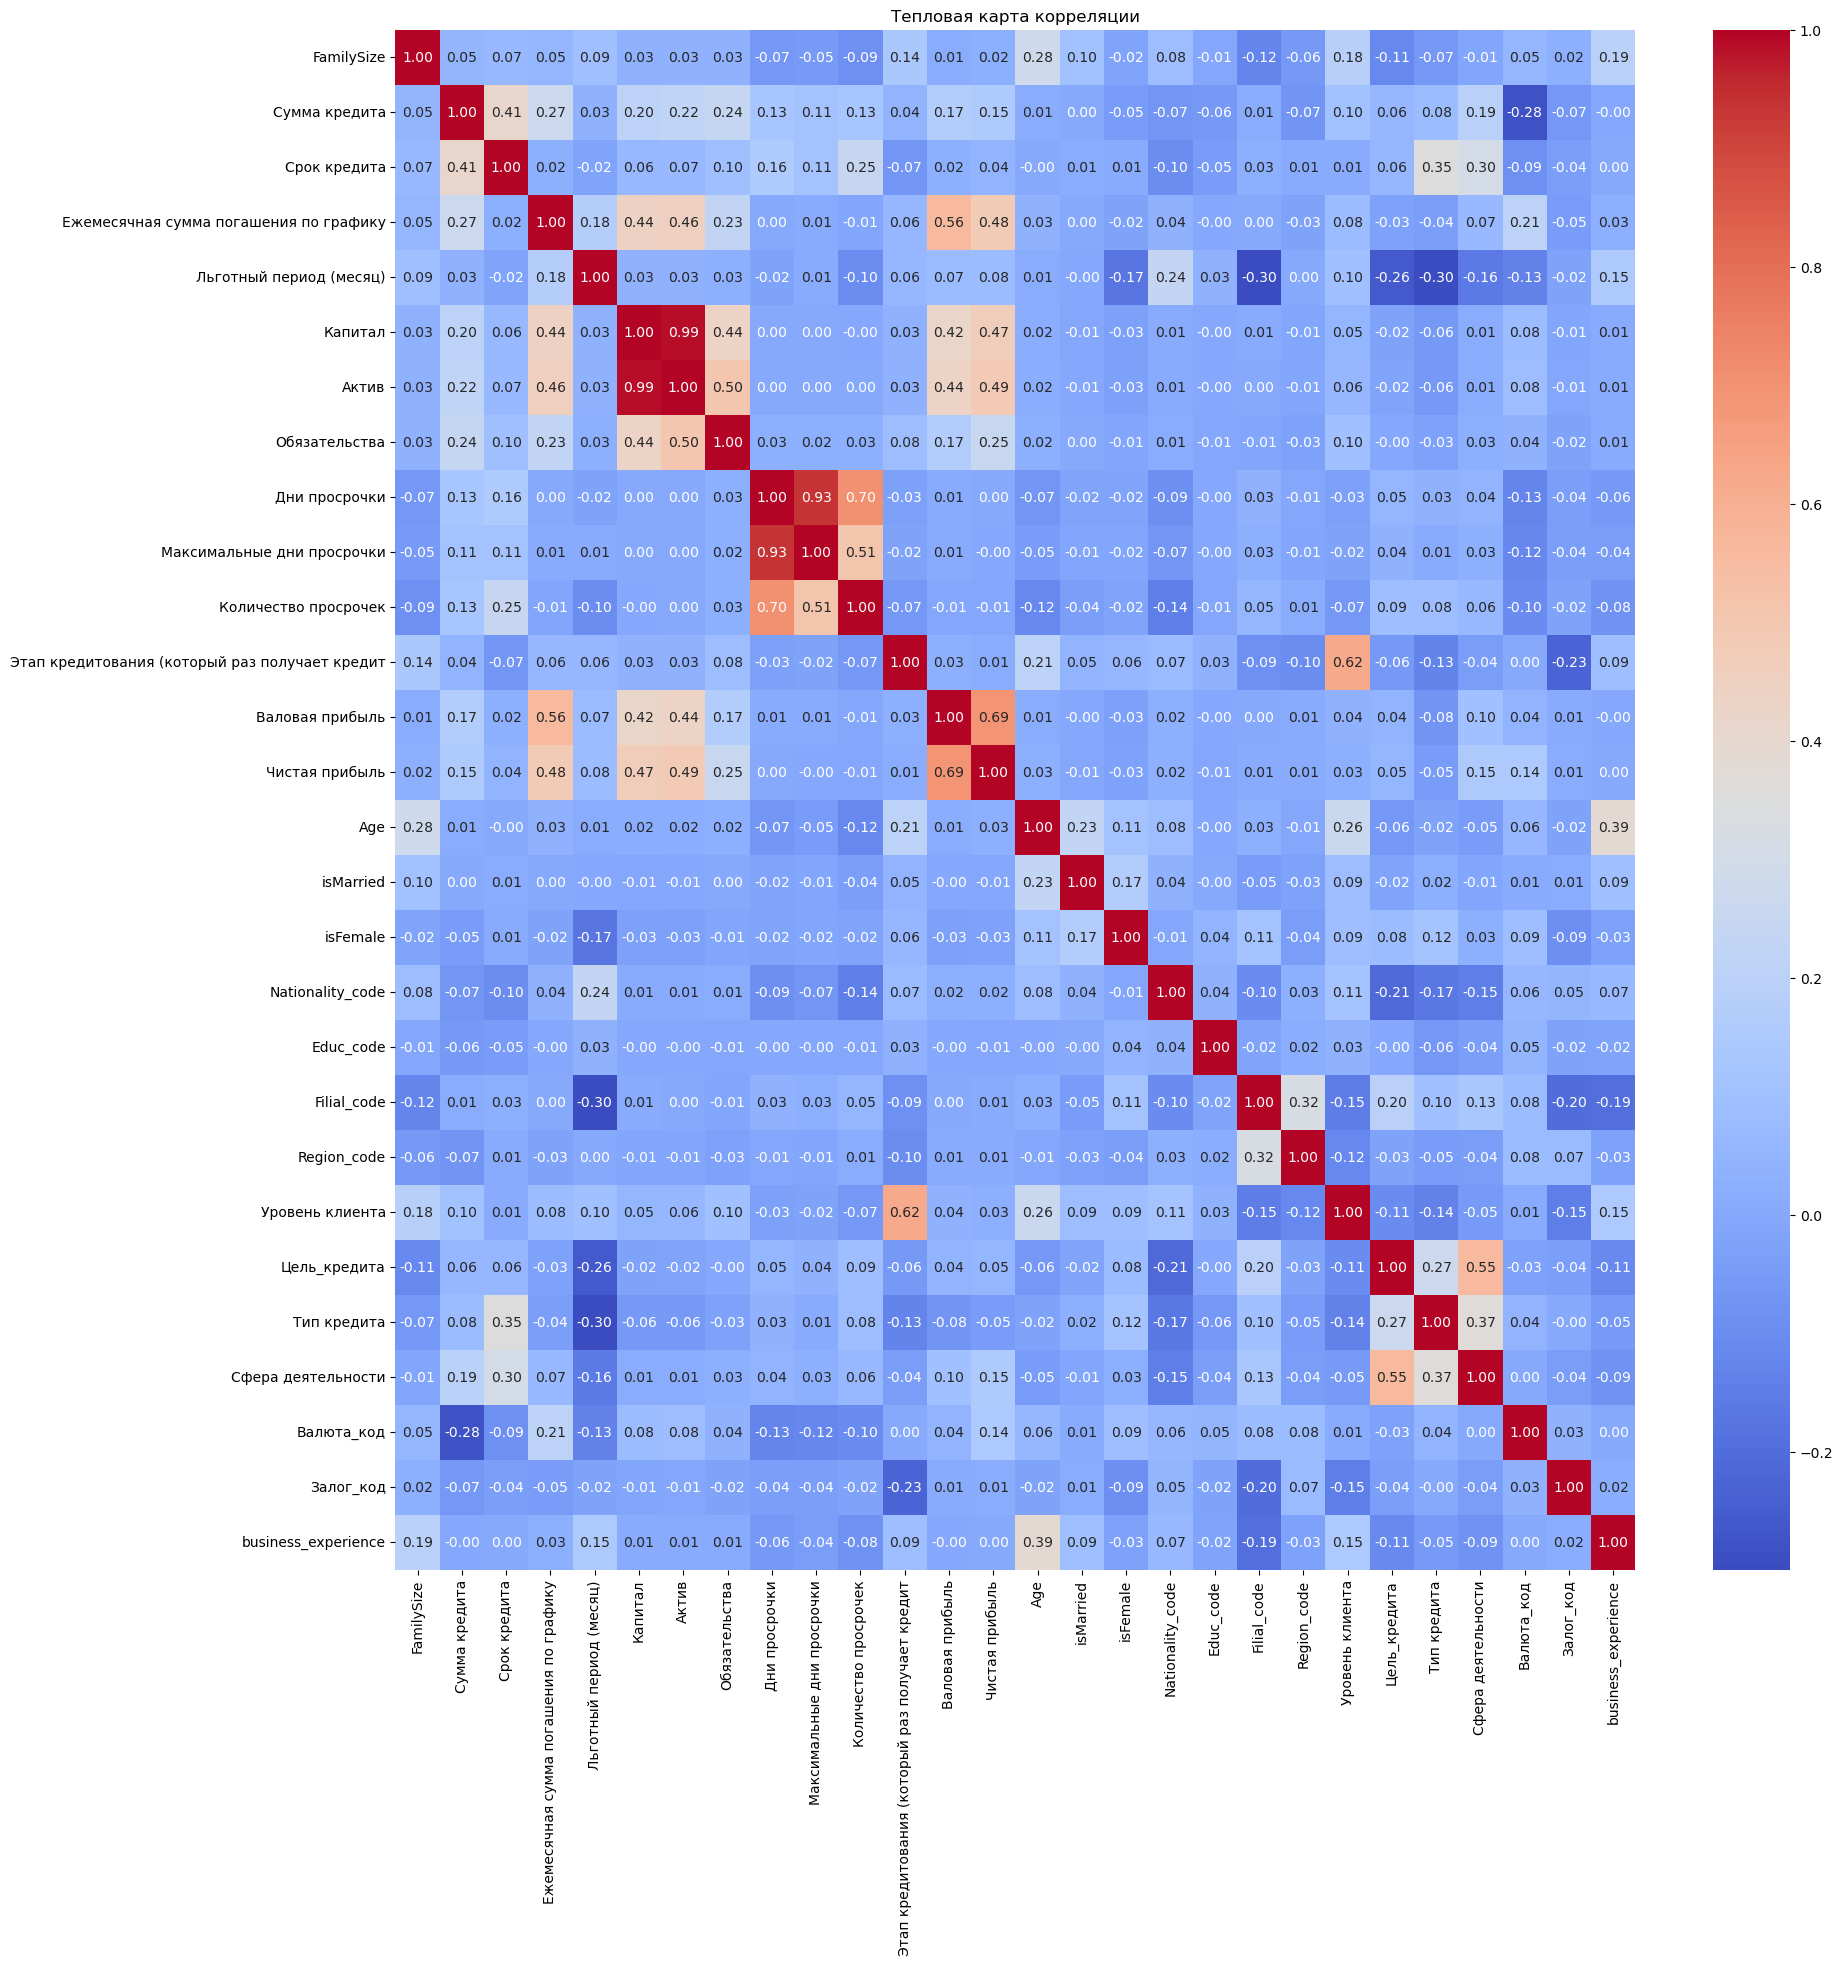

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Вычисляем корреляцию
correlation_matrix = data1.corr()

# Рисуем тепловую карту корреляции
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Тепловая карта корреляции')
plt.show()

In [58]:
#Удаляем переменные, у которых корреляция по отношению ко всем другим переменным ниже 0.35
data1 = data1.drop(['FamilySize', 'Льготный период (месяц)', 'isMarried', 'isFemale','Nationality_code',
                   'Educ_code','Filial_code','Валюта_код','Залог_код', 'Ежемесячная сумма погашения по графику', 'Капитал','Актив'], axis=1)

In [59]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85422 entries, 0 to 85421
Data columns (total 16 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Сумма кредита                                   85422 non-null  float64
 1   Срок кредита                                    85422 non-null  int64  
 2   Обязательства                                   85422 non-null  float64
 3   Дни просрочки                                   85422 non-null  int64  
 4   Максимальные дни просрочки                      85422 non-null  int64  
 5   Количество просрочек                            85422 non-null  int64  
 6   Этап кредитования (который раз получает кредит  85422 non-null  int64  
 7   Валовая прибыль                                 85422 non-null  float64
 8   Чистая прибыль                                  85422 non-null  float64
 9   Age                                    

In [60]:
import numpy as np
from scipy.stats import mode

mode_age = mode(data1['Age'])
print(f"Мода: {mode_age.mode[0]}, Частота: {mode_age.count[0]}")

Мода: 28, Частота: 2617


C:\Users\extre\AppData\Local\Temp\ipykernel_28496\1152296334.py:4: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_age = mode(data1['Age'])


In [61]:
mode_term = mode(data1['Срок кредита'])
print(f"Мода: {mode_term.mode[0]}, Частота: {mode_term.count[0]}")

Мода: 12, Частота: 54960


C:\Users\extre\AppData\Local\Temp\ipykernel_28496\2687462907.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_term = mode(data1['Срок кредита'])


In [63]:
mode_aim = mode(data1['Цель_кредита'])
print(f"Мода: {mode_aim.mode[0]}, Частота: {mode_aim.count[0]}")

Мода: 0, Частота: 35514


C:\Users\extre\AppData\Local\Temp\ipykernel_28496\1784171772.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_aim = mode(data1['Цель_кредита'])


In [64]:
mode_type = mode(data1['Тип кредита'])
print(f"Мода: {mode_type.mode[0]}, Частота: {mode_type.count[0]}")

Мода: 0, Частота: 54929


C:\Users\extre\AppData\Local\Temp\ipykernel_28496\105285817.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_type = mode(data1['Тип кредита'])


Как видно из моды чаще всего берут кредит клиенты в возрасте 28 лет, целью кредита в большинстве случаев является животноводство и производство молока, и клиенты обычно берут кредит на предпринимательскую деятельность, и кредит берут чаще всего с сроком на 12 месяцев

In [65]:
mean_sum = data1['Сумма кредита'].mean()
print(f"Среднее значение: {mean_sum}")

Среднее значение: 6716.636227139742


In [66]:
min_sum = data1['Сумма кредита'].min()
max_sum = data1['Сумма кредита'].max()
print(f"Минимум: {min_sum}, Максимум: {max_sum}")

Минимум: 50.0, Максимум: 339660.0


Судя по среднему значению клиенты в среднем берут кредит на 6716 сомони; минимальный кредит, который брали, - 50 сомон, максимальный-339660 сомон

### Б) нарисуйте графики (Box-plot, Scatter-plot и др.)  по некоторым значимым переменам

In [67]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85422 entries, 0 to 85421
Data columns (total 16 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Сумма кредита                                   85422 non-null  float64
 1   Срок кредита                                    85422 non-null  int64  
 2   Обязательства                                   85422 non-null  float64
 3   Дни просрочки                                   85422 non-null  int64  
 4   Максимальные дни просрочки                      85422 non-null  int64  
 5   Количество просрочек                            85422 non-null  int64  
 6   Этап кредитования (который раз получает кредит  85422 non-null  int64  
 7   Валовая прибыль                                 85422 non-null  float64
 8   Чистая прибыль                                  85422 non-null  float64
 9   Age                                    

In [68]:
data1.columns

Index(['Сумма кредита', 'Срок кредита', 'Обязательства', 'Дни просрочки',
       'Максимальные дни просрочки', 'Количество просрочек',
       'Этап кредитования (который раз получает кредит', 'Валовая прибыль',
       'Чистая прибыль', 'Age', 'Region_code', 'Уровень клиента',
       'Цель_кредита', 'Тип кредита', 'Сфера деятельности',
       'business_experience'],
      dtype='object')

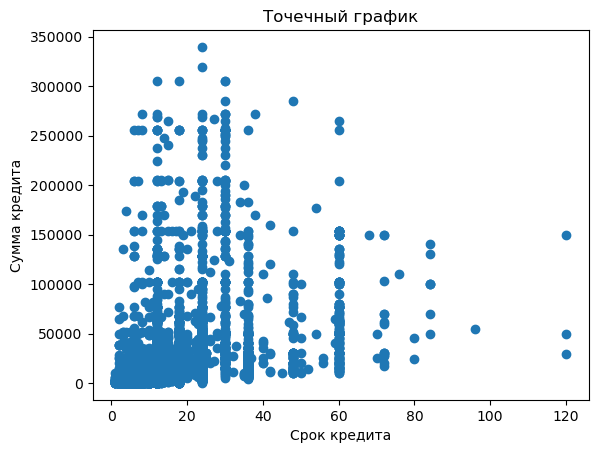

In [69]:
plt.scatter(data1['Срок кредита'], data1['Сумма кредита'])
plt.title('Точечный график')
plt.xlabel('Срок кредита')
plt.ylabel('Сумма кредита')
plt.show()

C:\Users\extre\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\extre\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\extre\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


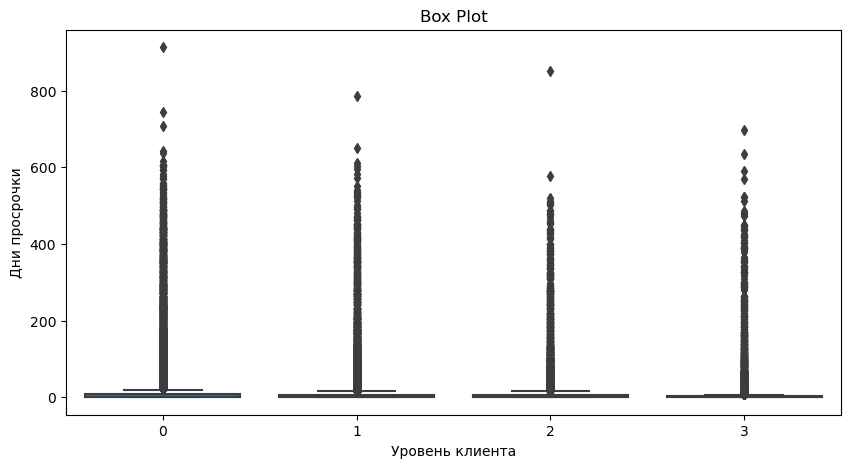

In [70]:
fig = plt.subplots(figsize=(10, 5))
sns.boxplot(x=data1['Уровень клиента'], y=data1['Дни просрочки'], data=data1)
plt.title('Box Plot')
plt.xlabel('Уровень клиента')
plt.ylabel('Дни просрочки')
plt.show()

### В) Нарисуйте корреляционную матрицу переменных с непрерывными данными

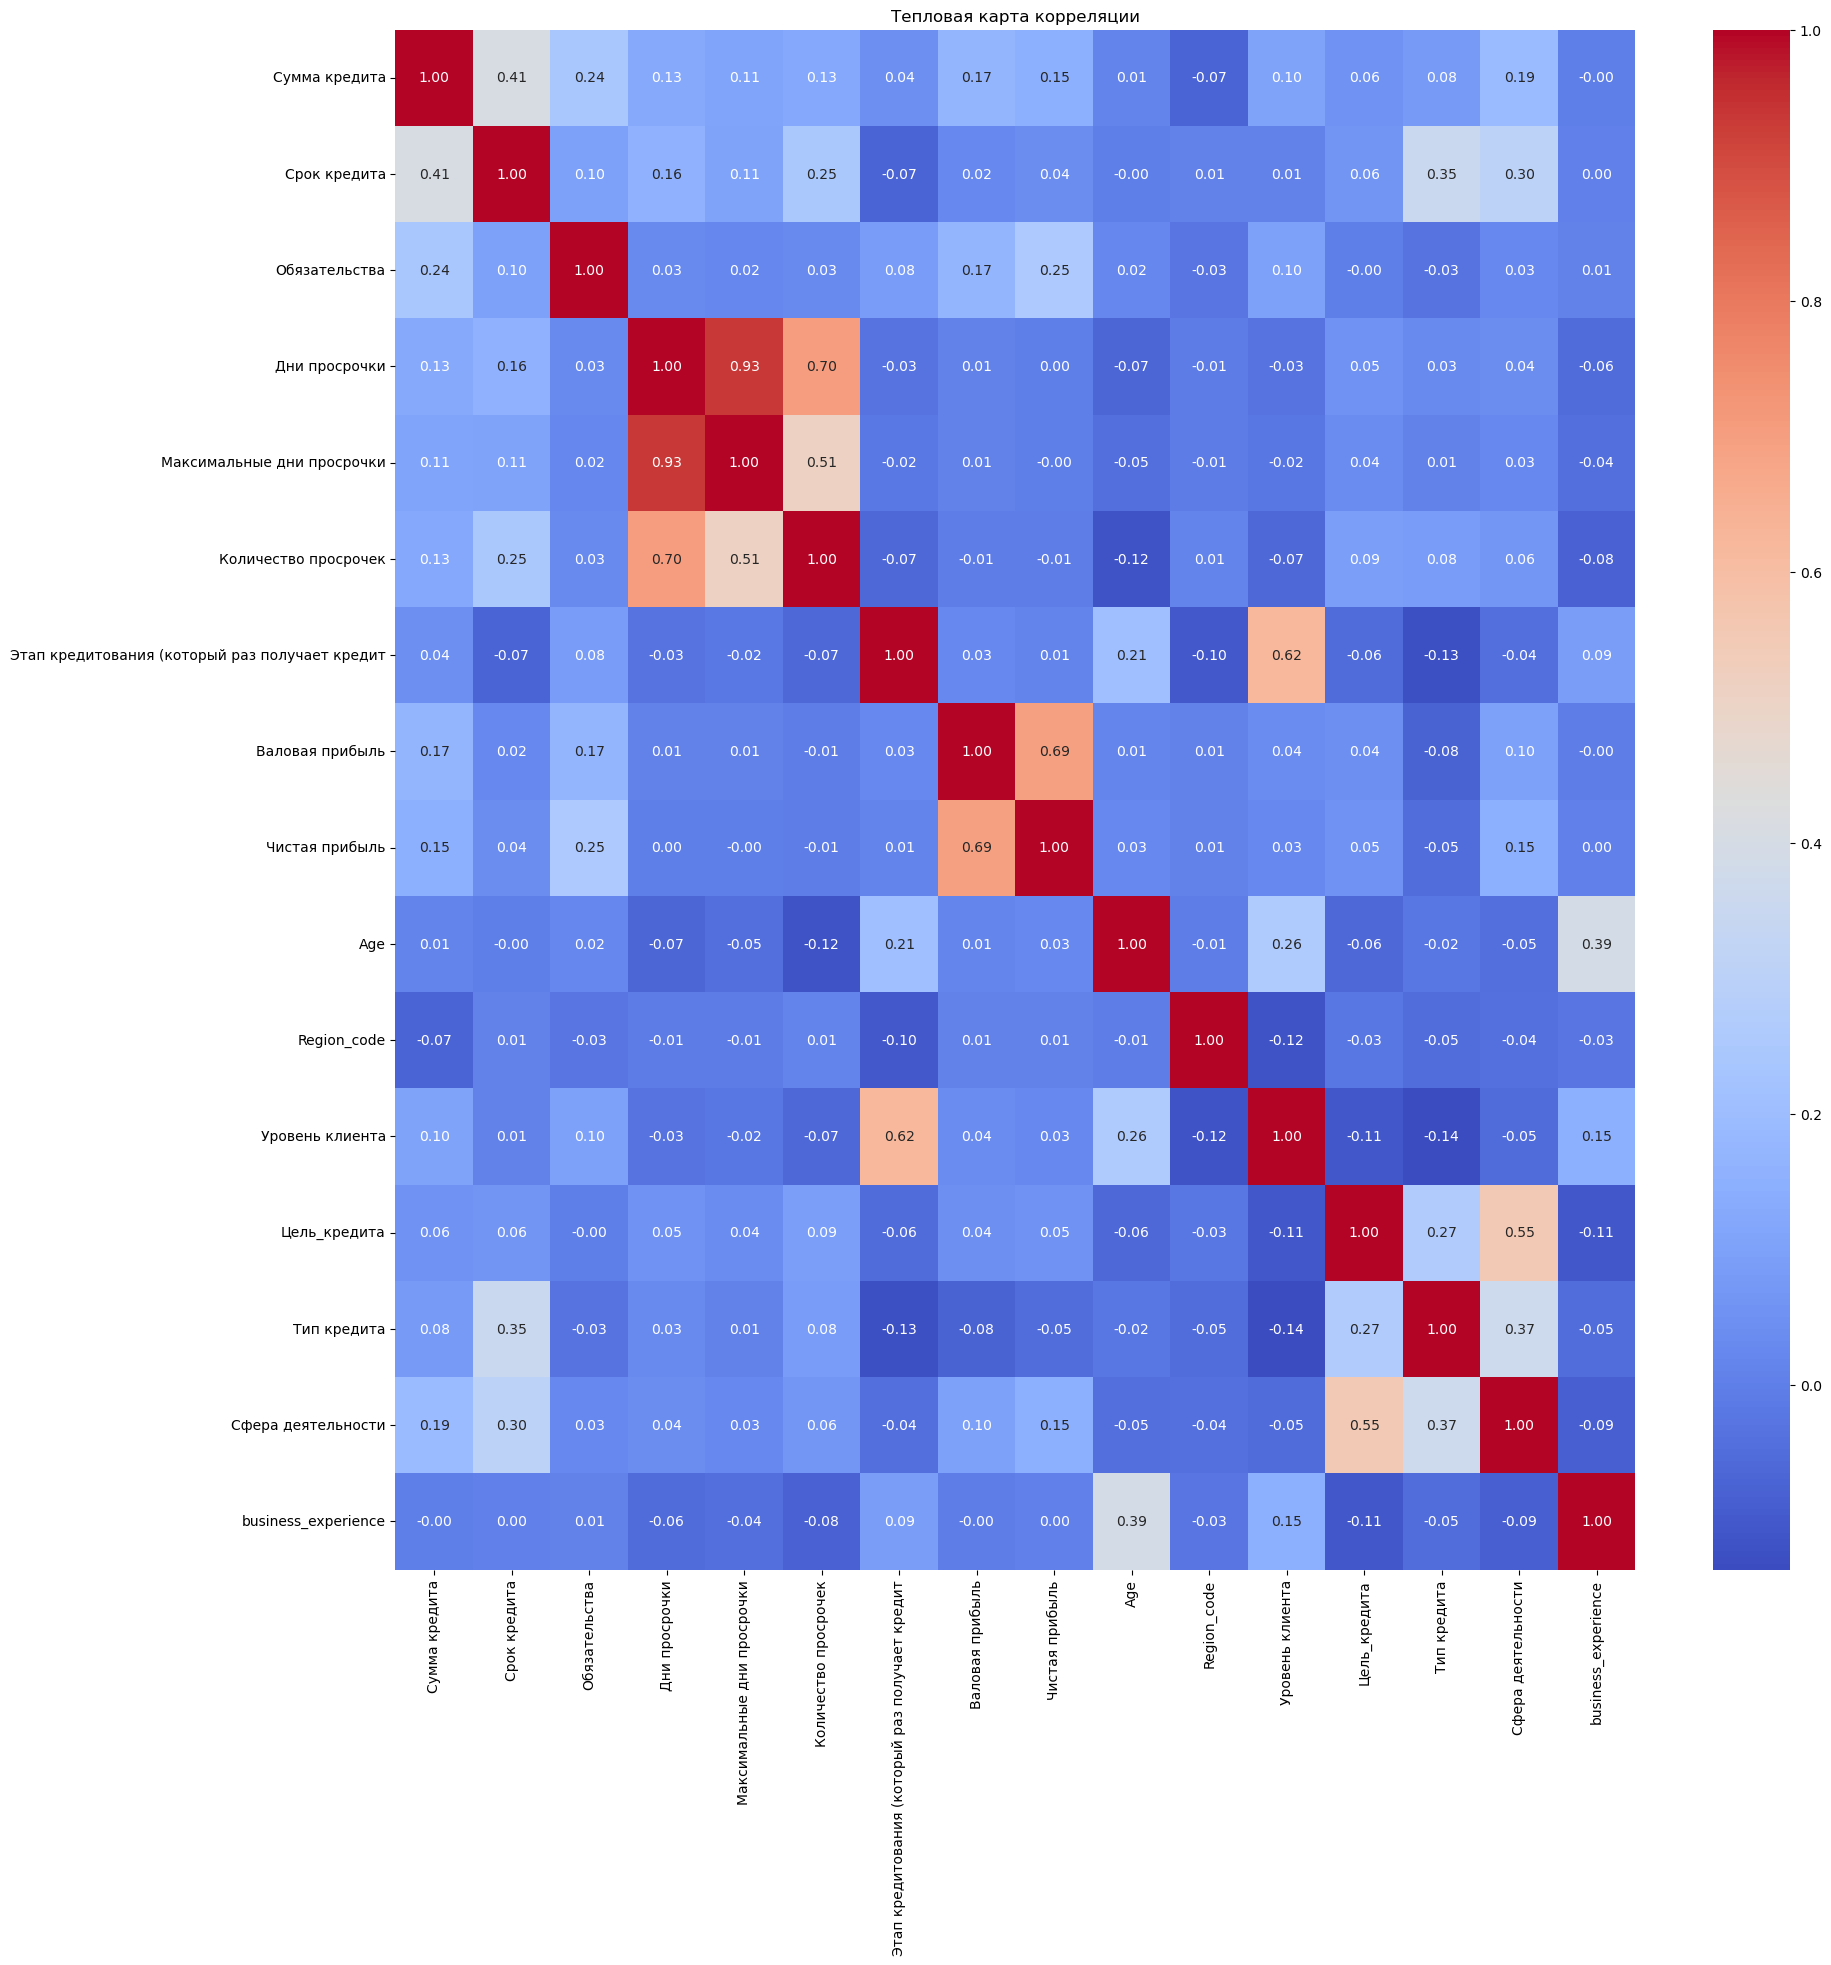

In [71]:
# Вычисляем корреляцию
correlation_matrix = data1.corr()

# Рисуем тепловую карту корреляции
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Тепловая карта корреляции')
plt.show()


# Используйте всевозможные входные параметры (независимые переменные) и зависимую переменную «Дни просрочки» (меньше 30 дней, 0 дней, 7 дней и 15 дней, 60 дней как 1 и больше как 0 для решения задачи классификации.

In [72]:
data1.columns

Index(['Сумма кредита', 'Срок кредита', 'Обязательства', 'Дни просрочки',
       'Максимальные дни просрочки', 'Количество просрочек',
       'Этап кредитования (который раз получает кредит', 'Валовая прибыль',
       'Чистая прибыль', 'Age', 'Region_code', 'Уровень клиента',
       'Цель_кредита', 'Тип кредита', 'Сфера деятельности',
       'business_experience'],
      dtype='object')

In [73]:
#Удаляем ненужный столбец
data1 = data1.drop('Максимальные дни просрочки', axis=1)

In [74]:
#Создаем новый столбец среднее количество просроченных дней
data1['Сред_просрочки'] = data1['Дни просрочки']/data1['Количество просрочек']

In [75]:
data1.head()

,Сумма кредита,Срок кредита,Обязательства,Дни просрочки,Количество просрочек,Этап кредитования (который раз получает кредит,Валовая прибыль,Чистая прибыль,Age,Region_code,Уровень клиента,Цель_кредита,Тип кредита,Сфера деятельности,business_experience,Сред_просрочки
0,6793.2,12,0.0,46,4,1,0.0,180.0,39,0,0,0,0,0,2,11.5
1,1000.0,12,0.0,11,5,1,0.0,0.0,80,1,0,1,1,1,1,2.2
2,7600.0,12,0.0,0,0,2,0.0,1648.0,82,1,1,2,1,2,1,NaN
3,1500.0,12,0.0,0,0,1,0.0,150.0,80,0,0,0,0,0,0,NaN
4,2500.0,12,543.0,15,2,2,0.0,280.0,75,2,1,0,0,0,0,7.5


In [76]:
#Заполняем пустые ячейки значением 0, так как клиент ни разу не просрочивал
data1['Сред_просрочки'].fillna(0, inplace=True)

### Создание и заполнение нового столбца "выдача"

#### Трешхолд 30 дней

In [77]:
data1.loc[data1['Сред_просрочки']<=30, 'выдача']=1
data1.loc[data1['Сред_просрочки']>30, 'выдача']=0

In [78]:
data1

,Сумма кредита,Срок кредита,Обязательства,Дни просрочки,Количество просрочек,Этап кредитования (который раз получает кредит,Валовая прибыль,Чистая прибыль,Age,Region_code,Уровень клиента,Цель_кредита,Тип кредита,Сфера деятельности,business_experience,Сред_просрочки,выдача
0,6793.20,12,0.0,46,4,1,0.0,180.0,39,0,0,0,0,0,2,11.500000,1.0
1,1000.00,12,0.0,11,5,1,0.0,0.0,80,1,0,1,1,1,1,2.200000,1.0
2,7600.00,12,0.0,0,0,2,0.0,1648.0,82,1,1,2,1,2,1,0.000000,1.0
3,1500.00,12,0.0,0,0,1,0.0,150.0,80,0,0,0,0,0,0,0.000000,1.0
4,2500.00,12,543.0,15,2,2,0.0,280.0,75,2,1,0,0,0,0,7.500000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85417,5000.00,12,0.0,53,6,1,2500.0,2683.0,31,35,0,0,0,0,1,8.833333,1.0
85418,9510.48,24,0.0,0,0,1,7360.0,6536.0,25,3,1,4,0,5,1,0.000000,1.0
85419,30000.00,36,44800.0,0,0,1,5630.0,6043.0,41,37,3,2,3,11,1,0.000000,1.0
85420,3000.00,12,0.0,2,2,1,0.0,780.0,30,23,2,0,0,0,0,1.000000,1.0


In [79]:
data2 = data1.drop('Сред_просрочки', axis=1)

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#Смотрим какие переменные важны для столбца 'Дни просрочки'
features = data2.drop(['выдача'], axis=1)
target = data2['выдача']

# Разделяем данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Создаем модель случайного леса
rf_model = RandomForestClassifier(random_state=42)

# Обучаем модель на обучающем наборе данных
rf_model.fit(X_train, y_train)

# Получаем важность признаков
feature_importances = rf_model.feature_importances_

# Создаем DataFrame для отображения важности признаков
feature_importance_df = pd.DataFrame({'Feature': features.columns, 'Importance': feature_importances})

# Сортируем по убыванию важности
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Выводим результаты
print(feature_importance_df)


                                           Feature  Importance
3                                    Дни просрочки    0.573081
4                             Количество просрочек    0.133553
1                                     Срок кредита    0.048882
7                                   Чистая прибыль    0.041345
0                                    Сумма кредита    0.036815
8                                              Age    0.029360
9                                      Region_code    0.026401
6                                  Валовая прибыль    0.024841
11                                    Цель_кредита    0.015700
2                                    Обязательства    0.015298
5   Этап кредитования (который раз получает кредит    0.014043
13                              Сфера деятельности    0.012779
14                             business_experience    0.009777
10                                 Уровень клиента    0.009130
12                                     Тип кредита    0

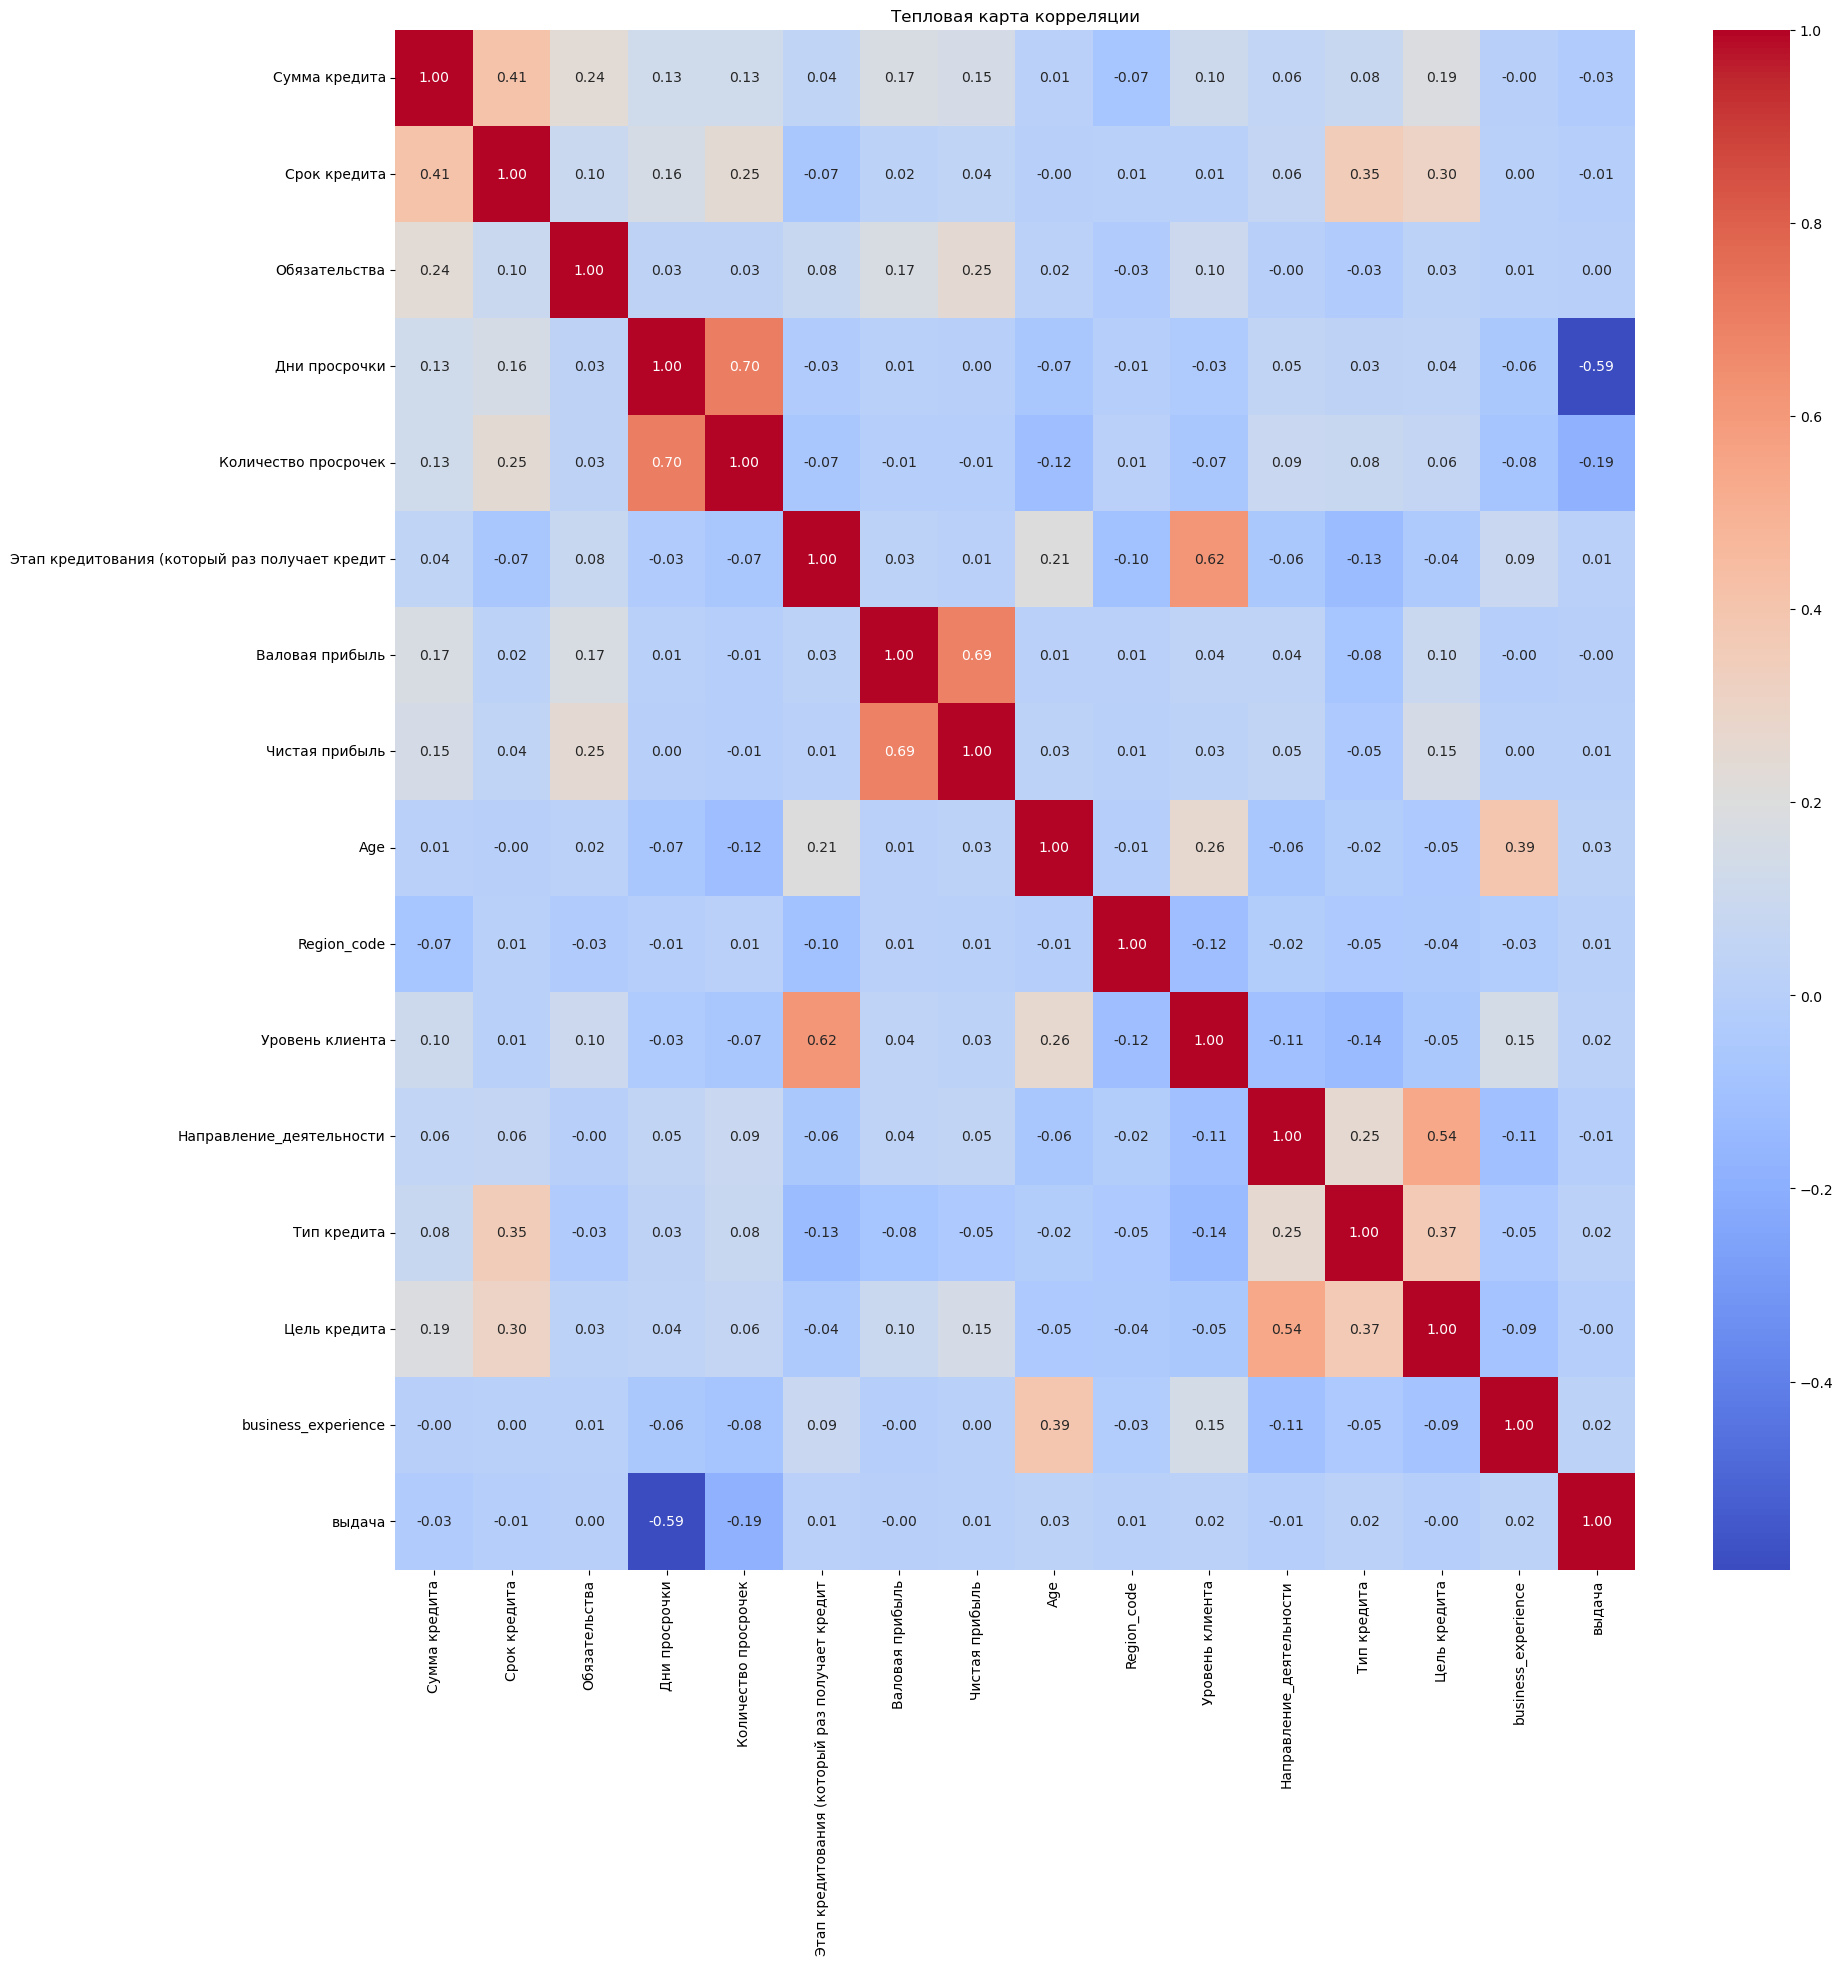

In [70]:
# Вычисляем корреляцию
correlation_matrix = data2.corr()

# Рисуем тепловую карту корреляции
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Тепловая карта корреляции')
plt.show()

Исходя из features importance, используем в качестве входных данных следующие переменные:

In [82]:
#Берем переменные, у которох Importance выше 0.012
data3 = data1.drop(['Сред_просрочки','Обязательства','Сфера деятельности','Тип кредита','Уровень клиента'], axis=1)

In [83]:
X = data3.drop("выдача", axis=1)
y = data3["выдача"]

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Я не буду использовать модель SVC, так как данная моедль тренируется очень медленно и выдает очень плохие результаты

### А) логистическая регрессия

In [84]:
# Импорт необходимых библиотек
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Инициализация модели логистической регрессии
lr_model = LogisticRegression()

# Обучение модели на тренировочных данных
lr_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = lr_model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Вывод результатов
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')


Accuracy: 0.9965271003238771
Confusion Matrix:
[[  131    63]
 [   26 25407]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.68      0.75       194
         1.0       1.00      1.00      1.00     25433

    accuracy                           1.00     25627
   macro avg       0.92      0.84      0.87     25627
weighted avg       1.00      1.00      1.00     25627



C:\Users\extre\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [85]:
from sklearn.metrics import roc_auc_score
auc_lr = roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1])
print("Логистическая регрессия:")
print(f'AUC: {auc_lr}')

Логистическая регрессия:
AUC: 0.9821076278444962


### Б) дерево решений;

In [86]:
from sklearn.tree import DecisionTreeClassifier

# Инициализация модели дерева решений
DecTree_model = DecisionTreeClassifier()

# Обучение модели на тренировочных данных
DecTree_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = DecTree_model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Вывод результатов
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')


Accuracy: 0.9992976157958403
Confusion Matrix:
[[  186     8]
 [   10 25423]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.95       194
         1.0       1.00      1.00      1.00     25433

    accuracy                           1.00     25627
   macro avg       0.97      0.98      0.98     25627
weighted avg       1.00      1.00      1.00     25627



In [87]:
auc_DecTree = roc_auc_score(y_test, DecTree_model.predict_proba(X_test)[:, 1])
print("\nдерево решений:")
print(f'AUC: {auc_DecTree}')


дерево решений:
AUC: 0.9791848483239366


### В) случайны лес;

In [88]:
from sklearn.ensemble import RandomForestClassifier

# Инициализация модели дерева решений
randf_model = RandomForestClassifier()

# Обучение модели на тренировочных данных
randf_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = randf_model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Вывод результатов
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')


Accuracy: 0.998400124868303
Confusion Matrix:
[[  160    34]
 [    7 25426]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.82      0.89       194
         1.0       1.00      1.00      1.00     25433

    accuracy                           1.00     25627
   macro avg       0.98      0.91      0.94     25627
weighted avg       1.00      1.00      1.00     25627



In [90]:
auc_randf = roc_auc_score(y_test, randf_model.predict_proba(X_test)[:, 1])
print("\nслучайны лес:")
print(f'AUC: {auc_randf}')


случайны лес:
AUC: 0.9997191934660747


### Г) К-ближайших соседей;

In [91]:
from sklearn.neighbors import KNeighborsClassifier

# Инициализация модели k-ближайших соседей
k = 2  # у нас только два значения: выдать или не выдать
knn_model = KNeighborsClassifier(n_neighbors=k)

# Обучение модели на тренировочных данных
knn_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = knn_model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Вывод результатов
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')


Accuracy: 0.9901666211417646
Confusion Matrix:
[[   79   115]
 [  137 25296]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.37      0.41      0.39       194
         1.0       1.00      0.99      1.00     25433

    accuracy                           0.99     25627
   macro avg       0.68      0.70      0.69     25627
weighted avg       0.99      0.99      0.99     25627



In [92]:
auc_knn = roc_auc_score(y_test, knn_model.predict_proba(X_test)[:, 1])
print("\nK-ближайших соседей:")
print(f'AUC: {auc_knn}')


K-ближайших соседей:
AUC: 0.7011877984646137


### Е) алгоритмы бустинга

In [93]:
from xgboost import XGBClassifier

# XGBoost
xgb_model = XGBClassifier()

# Обучение модели на тренировочных данных
xgb_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred_xgb = xgb_model.predict(X_test)

# Оценка качества модели
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
classification_rep_xgb = classification_report(y_test, y_pred_xgb)

# Вывод результатов
print("XGBoost:")
print(f'Accuracy: {accuracy_xgb}')
print(f'Confusion Matrix:\n{conf_matrix_xgb}')
print(f'Classification Report:\n{classification_rep_xgb}')

C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C

XGBoost:
Accuracy: 0.9991415304171382
Confusion Matrix:
[[  183    11]
 [   11 25422]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94       194
         1.0       1.00      1.00      1.00     25433

    accuracy                           1.00     25627
   macro avg       0.97      0.97      0.97     25627
weighted avg       1.00      1.00      1.00     25627



In [94]:
from sklearn.ensemble import GradientBoostingClassifier
# Gradient Boosting
gb_model = GradientBoostingClassifier()

# Обучение модели на тренировочных данных
gb_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred_gb = gb_model.predict(X_test)

# Оценка качества модели
accuracy_gb = accuracy_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
classification_rep_gb = classification_report(y_test, y_pred_gb)

# Вывод результатов
print("\nGradient Boosting:")
print(f'Accuracy: {accuracy_gb}')
print(f'Confusion Matrix:\n{conf_matrix_gb}')
print(f'Classification Report:\n{classification_rep_gb}')


Gradient Boosting:
Accuracy: 0.9993366371405159
Confusion Matrix:
[[  182    12]
 [    5 25428]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.94      0.96       194
         1.0       1.00      1.00      1.00     25433

    accuracy                           1.00     25627
   macro avg       0.99      0.97      0.98     25627
weighted avg       1.00      1.00      1.00     25627



In [95]:
from catboost import CatBoostClassifier
# CatBoost
cat_model = CatBoostClassifier()

# Обучение моделей на тренировочных данных
cat_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred_cat = cat_model.predict(X_test)

# Оценка качества модели
accuracy_cat = accuracy_score(y_test, y_pred_cat)
conf_matrix_cat = confusion_matrix(y_test, y_pred_cat)
classification_rep_cat = classification_report(y_test, y_pred_cat)

# Вывод результатов
print("\nCatBoost:")
print(f'Accuracy: {accuracy_cat}')
print(f'Confusion Matrix:\n{conf_matrix_cat}')
print(f'Classification Report:\n{classification_rep_cat}')

Learning rate set to 0.059098
0:	learn: 0.5223356	total: 186ms	remaining: 3m 6s
1:	learn: 0.4002159	total: 213ms	remaining: 1m 46s
2:	learn: 0.3098299	total: 239ms	remaining: 1m 19s
3:	learn: 0.2169600	total: 263ms	remaining: 1m 5s
4:	learn: 0.1647745	total: 287ms	remaining: 57.2s
5:	learn: 0.1281217	total: 313ms	remaining: 51.9s
6:	learn: 0.0972451	total: 337ms	remaining: 47.8s
7:	learn: 0.0746779	total: 359ms	remaining: 44.5s
8:	learn: 0.0607902	total: 382ms	remaining: 42.1s
9:	learn: 0.0502354	total: 405ms	remaining: 40.1s
10:	learn: 0.0422289	total: 429ms	remaining: 38.5s
11:	learn: 0.0362215	total: 450ms	remaining: 37s
12:	learn: 0.0307106	total: 476ms	remaining: 36.2s
13:	learn: 0.0262978	total: 500ms	remaining: 35.2s
14:	learn: 0.0227454	total: 524ms	remaining: 34.4s
15:	learn: 0.0210729	total: 549ms	remaining: 33.8s
16:	learn: 0.0185730	total: 576ms	remaining: 33.3s
17:	learn: 0.0167348	total: 597ms	remaining: 32.5s
18:	learn: 0.0157521	total: 615ms	remaining: 31.8s
19:	learn: 

In [96]:
# Вычисление AUC для моделей
auc_xgb = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])
auc_gb = roc_auc_score(y_test, gb_model.predict_proba(X_test)[:, 1])
auc_cat = roc_auc_score(y_test, cat_model.predict_proba(X_test)[:, 1])

# Вывод результатов
print("XGBoost:")
print(f'AUC: {auc_xgb}')

print("\nGradient Boosting:")
print(f'AUC: {auc_gb}')

print("\nCatBoost:")
print(f'AUC: {auc_cat}')

C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)


XGBoost:
AUC: 0.9998621808422453

Gradient Boosting:
AUC: 0.9998110053461672

CatBoost:
AUC: 0.999919740608131


Лучший резултат дал модель Дерево Решений. Переходим дальше и смотрим Трешхолд 0 дней

### Трешхолд 0 дней

In [97]:
data1.loc[data1['Сред_просрочки']==0, 'выдача']=1
data1.loc[data1['Сред_просрочки']>0, 'выдача']=0

In [98]:
data1

,Сумма кредита,Срок кредита,Обязательства,Дни просрочки,Количество просрочек,Этап кредитования (который раз получает кредит,Валовая прибыль,Чистая прибыль,Age,Region_code,Уровень клиента,Цель_кредита,Тип кредита,Сфера деятельности,business_experience,Сред_просрочки,выдача
0,6793.20,12,0.0,46,4,1,0.0,180.0,39,0,0,0,0,0,2,11.500000,0.0
1,1000.00,12,0.0,11,5,1,0.0,0.0,80,1,0,1,1,1,1,2.200000,0.0
2,7600.00,12,0.0,0,0,2,0.0,1648.0,82,1,1,2,1,2,1,0.000000,1.0
3,1500.00,12,0.0,0,0,1,0.0,150.0,80,0,0,0,0,0,0,0.000000,1.0
4,2500.00,12,543.0,15,2,2,0.0,280.0,75,2,1,0,0,0,0,7.500000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85417,5000.00,12,0.0,53,6,1,2500.0,2683.0,31,35,0,0,0,0,1,8.833333,0.0
85418,9510.48,24,0.0,0,0,1,7360.0,6536.0,25,3,1,4,0,5,1,0.000000,1.0
85419,30000.00,36,44800.0,0,0,1,5630.0,6043.0,41,37,3,2,3,11,1,0.000000,1.0
85420,3000.00,12,0.0,2,2,1,0.0,780.0,30,23,2,0,0,0,0,1.000000,0.0


In [109]:
data3 = data1.drop(['Сред_просрочки','Обязательства','Сфера деятельности','Тип кредита','Уровень клиента'], axis=1)

In [110]:
X = data3.drop("выдача", axis=1)
y = data3["выдача"]

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [111]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Предполагаем, что у вас есть датафрейм data3
# Замените 'выдача' на реальное название вашей зависимой переменной
y = data3['выдача']
X = data3.drop('выдача', axis=1)  # Используйте все остальные столбцы в качестве независимых переменных

# Добавьте столбец с константой, если вы хотите оценить свободный член (intercept)
X_with_const = pd.concat([pd.Series(1, index=X.index, name='const'), X], axis=1)

# Вычисление VIF для каждого признака
vif_data = pd.DataFrame()
vif_data["Признак"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

# Вывод результатов
print(vif_data)


                                           Признак        VIF
0                                            const  22.703949
1                                    Сумма кредита   1.262489
2                                     Срок кредита   1.277437
3                                    Дни просрочки   1.992570
4                             Количество просрочек   2.090540
5   Этап кредитования (который раз получает кредит   1.070196
6                                  Валовая прибыль   1.948383
7                                   Чистая прибыль   1.936345
8                                              Age   1.235335
9                                      Region_code   1.019264
10                                    Цель_кредита   1.027763
11                             business_experience   1.192332


### А) логистическая регрессия 

In [112]:
# Инициализация модели логистической регрессии
lr_model = LogisticRegression()

# Обучение модели на тренировочных данных
lr_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = lr_model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Вывод результатов
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

C:\Users\extre\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.991220197448004
Confusion Matrix:
[[12876   161]
 [   64 12526]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     13037
         1.0       0.99      0.99      0.99     12590

    accuracy                           0.99     25627
   macro avg       0.99      0.99      0.99     25627
weighted avg       0.99      0.99      0.99     25627



In [113]:
auc_lr = roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1])
print("Логистическая регрессия:")
print(f'AUC: {auc_lr}')

Логистическая регрессия:
AUC: 0.9995253016967716


### Б) дерево решений;

In [114]:
# Инициализация модели дерева решений
DecTree_model = DecisionTreeClassifier()

# Обучение модели на тренировочных данных
DecTree_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = DecTree_model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Вывод результатов
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 1.0
Confusion Matrix:
[[13037     0]
 [    0 12590]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     13037
         1.0       1.00      1.00      1.00     12590

    accuracy                           1.00     25627
   macro avg       1.00      1.00      1.00     25627
weighted avg       1.00      1.00      1.00     25627



In [115]:
auc_DecTree = roc_auc_score(y_test, DecTree_model.predict_proba(X_test)[:, 1])
print("\nдерево решений:")
print(f'AUC: {auc_DecTree}')


дерево решений:
AUC: 1.0


### В) случайны лес;

In [116]:
# Инициализация модели дерева решений
randf_model = RandomForestClassifier()

# Обучение модели на тренировочных данных
randf_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = randf_model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Вывод результатов
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 1.0
Confusion Matrix:
[[13037     0]
 [    0 12590]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     13037
         1.0       1.00      1.00      1.00     12590

    accuracy                           1.00     25627
   macro avg       1.00      1.00      1.00     25627
weighted avg       1.00      1.00      1.00     25627



In [117]:
auc_randf = roc_auc_score(y_test, randf_model.predict_proba(X_test)[:, 1])
print("\nслучайны лес:")
print(f'AUC: {auc_randf}')


случайны лес:
AUC: 1.0


### Г) К-ближайших соседей;

In [118]:
from sklearn.neighbors import KNeighborsClassifier

# Инициализация модели k-ближайших соседей
k = 2  # у нас только два значения: выдать или не выдать
knn_model = KNeighborsClassifier(n_neighbors=k)

# Обучение модели на тренировочных данных
knn_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = knn_model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Вывод результатов
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.5837983376907169
Confusion Matrix:
[[10125  2912]
 [ 7754  4836]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.57      0.78      0.66     13037
         1.0       0.62      0.38      0.48     12590

    accuracy                           0.58     25627
   macro avg       0.60      0.58      0.57     25627
weighted avg       0.59      0.58      0.57     25627



In [119]:
auc_knn = roc_auc_score(y_test, knn_model.predict_proba(X_test)[:, 1])
print("\nK-ближайших соседей:")
print(f'AUC: {auc_knn}')


K-ближайших соседей:
AUC: 0.6351886635599309


### Е) алгоритмы бустинга

In [120]:
# XGBoost
xgb_model = XGBClassifier()

# Обучение модели на тренировочных данных
xgb_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred_xgb = xgb_model.predict(X_test)

# Оценка качества модели
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
classification_rep_xgb = classification_report(y_test, y_pred_xgb)

# Вывод результатов
print("XGBoost:")
print(f'Accuracy: {accuracy_xgb}')
print(f'Confusion Matrix:\n{conf_matrix_xgb}')
print(f'Classification Report:\n{classification_rep_xgb}')

C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C

XGBoost:
Accuracy: 1.0
Confusion Matrix:
[[13037     0]
 [    0 12590]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     13037
         1.0       1.00      1.00      1.00     12590

    accuracy                           1.00     25627
   macro avg       1.00      1.00      1.00     25627
weighted avg       1.00      1.00      1.00     25627



In [121]:
# Gradient Boosting
gb_model = GradientBoostingClassifier()

# Обучение модели на тренировочных данных
gb_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred_gb = gb_model.predict(X_test)

# Оценка качества модели
accuracy_gb = accuracy_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
classification_rep_gb = classification_report(y_test, y_pred_gb)

# Вывод результатов
print("\nGradient Boosting:")
print(f'Accuracy: {accuracy_gb}')
print(f'Confusion Matrix:\n{conf_matrix_gb}')
print(f'Classification Report:\n{classification_rep_gb}')


Gradient Boosting:
Accuracy: 1.0
Confusion Matrix:
[[13037     0]
 [    0 12590]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     13037
         1.0       1.00      1.00      1.00     12590

    accuracy                           1.00     25627
   macro avg       1.00      1.00      1.00     25627
weighted avg       1.00      1.00      1.00     25627



In [122]:
# CatBoost
cat_model = CatBoostClassifier()

# Обучение моделей на тренировочных данных
cat_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred_cat = cat_model.predict(X_test)

# Оценка качества модели
accuracy_cat = accuracy_score(y_test, y_pred_cat)
conf_matrix_cat = confusion_matrix(y_test, y_pred_cat)
classification_rep_cat = classification_report(y_test, y_pred_cat)

# Вывод результатов
print("\nCatBoost:")
print(f'Accuracy: {accuracy_cat}')
print(f'Confusion Matrix:\n{conf_matrix_cat}')
print(f'Classification Report:\n{classification_rep_cat}')

Learning rate set to 0.059098
0:	learn: 0.4791654	total: 39.9ms	remaining: 39.8s
1:	learn: 0.3173969	total: 77.3ms	remaining: 38.6s
2:	learn: 0.2225670	total: 110ms	remaining: 36.6s
3:	learn: 0.1553945	total: 140ms	remaining: 34.8s
4:	learn: 0.1056683	total: 174ms	remaining: 34.6s
5:	learn: 0.0713052	total: 204ms	remaining: 33.8s
6:	learn: 0.0477184	total: 231ms	remaining: 32.8s
7:	learn: 0.0326786	total: 263ms	remaining: 32.6s
8:	learn: 0.0232989	total: 294ms	remaining: 32.4s
9:	learn: 0.0163405	total: 326ms	remaining: 32.2s
10:	learn: 0.0116629	total: 361ms	remaining: 32.5s
11:	learn: 0.0085387	total: 397ms	remaining: 32.7s
12:	learn: 0.0064323	total: 431ms	remaining: 32.7s
13:	learn: 0.0048750	total: 464ms	remaining: 32.7s
14:	learn: 0.0037460	total: 500ms	remaining: 32.8s
15:	learn: 0.0029729	total: 533ms	remaining: 32.8s
16:	learn: 0.0024011	total: 560ms	remaining: 32.4s
17:	learn: 0.0019348	total: 589ms	remaining: 32.1s
18:	learn: 0.0015925	total: 618ms	remaining: 31.9s
19:	learn

In [123]:
# Вычисление AUC для моделей
auc_xgb = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])
auc_gb = roc_auc_score(y_test, gb_model.predict_proba(X_test)[:, 1])
auc_cat = roc_auc_score(y_test, cat_model.predict_proba(X_test)[:, 1])

# Вывод результатов
print("XGBoost:")
print(f'AUC: {auc_xgb}')

print("\nGradient Boosting:")
print(f'AUC: {auc_gb}')

print("\nCatBoost:")
print(f'AUC: {auc_cat}')

XGBoost:
AUC: 1.0

Gradient Boosting:
AUC: 1.0

CatBoost:
AUC: 1.0


C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)


In [124]:
import pickle

# Сохранение модели в файл
with open('DecTree_model.pkl', 'wb') as file:
    pickle.dump(DecTree_model, file)
with open('knn_model.pkl', 'wb') as file:
    pickle.dump(knn_model, file)
with open('lr_model.pkl', 'wb') as file:
    pickle.dump(lr_model, file)  

В данном трешхолде идеальный результат показали сразу несколько моделей: Дерево решений, Случайное лес, Алгоритмы бустинга 

## Трешхолд 7 дней

In [125]:
data1.loc[data1['Сред_просрочки']<=7, 'выдача']=1
data1.loc[data1['Сред_просрочки']>7, 'выдача']=0

In [126]:
data1

,Сумма кредита,Срок кредита,Обязательства,Дни просрочки,Количество просрочек,Этап кредитования (который раз получает кредит,Валовая прибыль,Чистая прибыль,Age,Region_code,Уровень клиента,Цель_кредита,Тип кредита,Сфера деятельности,business_experience,Сред_просрочки,выдача
0,6793.20,12,0.0,46,4,1,0.0,180.0,39,0,0,0,0,0,2,11.500000,0.0
1,1000.00,12,0.0,11,5,1,0.0,0.0,80,1,0,1,1,1,1,2.200000,1.0
2,7600.00,12,0.0,0,0,2,0.0,1648.0,82,1,1,2,1,2,1,0.000000,1.0
3,1500.00,12,0.0,0,0,1,0.0,150.0,80,0,0,0,0,0,0,0.000000,1.0
4,2500.00,12,543.0,15,2,2,0.0,280.0,75,2,1,0,0,0,0,7.500000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85417,5000.00,12,0.0,53,6,1,2500.0,2683.0,31,35,0,0,0,0,1,8.833333,0.0
85418,9510.48,24,0.0,0,0,1,7360.0,6536.0,25,3,1,4,0,5,1,0.000000,1.0
85419,30000.00,36,44800.0,0,0,1,5630.0,6043.0,41,37,3,2,3,11,1,0.000000,1.0
85420,3000.00,12,0.0,2,2,1,0.0,780.0,30,23,2,0,0,0,0,1.000000,1.0


In [127]:
data3 = data1.drop(['Сред_просрочки','Обязательства','Сфера деятельности','Тип кредита','Уровень клиента'], axis=1)

In [128]:
X = data3.drop("выдача", axis=1)
y = data3["выдача"]

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### А) логистическая регрессия

In [129]:
# Инициализация модели логистической регрессии
lr_model = LogisticRegression()

# Обучение модели на тренировочных данных
lr_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = lr_model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Вывод результатов
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

C:\Users\extre\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9603152924649784
Confusion Matrix:
[[ 1762   717]
 [  300 22848]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.71      0.78      2479
         1.0       0.97      0.99      0.98     23148

    accuracy                           0.96     25627
   macro avg       0.91      0.85      0.88     25627
weighted avg       0.96      0.96      0.96     25627



In [130]:
auc_lr = roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1])
print("Логистическая регрессия:")
print(f'AUC: {auc_lr}')

Логистическая регрессия:
AUC: 0.9537970341921039


### Б) дерево решений;

In [131]:
# Инициализация модели дерева решений
DecTree_model = DecisionTreeClassifier()

# Обучение модели на тренировочных данных
DecTree_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = DecTree_model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Вывод результатов
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9996488078979202
Confusion Matrix:
[[ 2472     7]
 [    2 23146]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2479
         1.0       1.00      1.00      1.00     23148

    accuracy                           1.00     25627
   macro avg       1.00      1.00      1.00     25627
weighted avg       1.00      1.00      1.00     25627



In [132]:
auc_DecTree = roc_auc_score(y_test, DecTree_model.predict_proba(X_test)[:, 1])
print("\nдерево решений:")
print(f'AUC: {auc_DecTree}')


дерево решений:
AUC: 0.9985449401027034


### В) случайны лес;

In [133]:
# Инициализация модели дерева решений
randf_model = RandomForestClassifier()

# Обучение модели на тренировочных данных
randf_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = randf_model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Вывод результатов
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9987513169703828
Confusion Matrix:
[[ 2476     3]
 [   29 23119]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      2479
         1.0       1.00      1.00      1.00     23148

    accuracy                           1.00     25627
   macro avg       0.99      1.00      1.00     25627
weighted avg       1.00      1.00      1.00     25627



In [134]:
auc_randf = roc_auc_score(y_test, randf_model.predict_proba(X_test)[:, 1])
print("\nслучайны лес:")
print(f'AUC: {auc_randf}')


случайны лес:
AUC: 0.9999312873375685


### Г) К-ближайших соседей;

In [135]:
from sklearn.neighbors import KNeighborsClassifier

# Инициализация модели k-ближайших соседей
k = 2  # у нас только два значения: выдать или не выдать
knn_model = KNeighborsClassifier(n_neighbors=k)

# Обучение модели на тренировочных данных
knn_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = knn_model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Вывод результатов
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.8799703437780466
Confusion Matrix:
[[ 1313  1166]
 [ 1910 21238]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.41      0.53      0.46      2479
         1.0       0.95      0.92      0.93     23148

    accuracy                           0.88     25627
   macro avg       0.68      0.72      0.70     25627
weighted avg       0.90      0.88      0.89     25627



In [136]:
auc_knn = roc_auc_score(y_test, knn_model.predict_proba(X_test)[:, 1])
print("\nK-ближайших соседей:")
print(f'AUC: {auc_knn}')


K-ближайших соседей:
AUC: 0.7327383440635222


### Е) алгоритмы бустинга

In [137]:
# XGBoost
xgb_model = XGBClassifier()

# Обучение модели на тренировочных данных
xgb_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred_xgb = xgb_model.predict(X_test)

# Оценка качества модели
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
classification_rep_xgb = classification_report(y_test, y_pred_xgb)

# Вывод результатов
print("XGBoost:")
print(f'Accuracy: {accuracy_xgb}')
print(f'Confusion Matrix:\n{conf_matrix_xgb}')
print(f'Classification Report:\n{classification_rep_xgb}')

C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C

XGBoost:
Accuracy: 0.9994537011745425
Confusion Matrix:
[[ 2474     5]
 [    9 23139]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2479
         1.0       1.00      1.00      1.00     23148

    accuracy                           1.00     25627
   macro avg       1.00      1.00      1.00     25627
weighted avg       1.00      1.00      1.00     25627



In [138]:
# Gradient Boosting
gb_model = GradientBoostingClassifier()

# Обучение модели на тренировочных данных
gb_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred_gb = gb_model.predict(X_test)

# Оценка качества модели
accuracy_gb = accuracy_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
classification_rep_gb = classification_report(y_test, y_pred_gb)

# Вывод результатов
print("\nGradient Boosting:")
print(f'Accuracy: {accuracy_gb}')
print(f'Confusion Matrix:\n{conf_matrix_gb}')
print(f'Classification Report:\n{classification_rep_gb}')


Gradient Boosting:
Accuracy: 0.9998048932766224
Confusion Matrix:
[[ 2478     1]
 [    4 23144]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2479
         1.0       1.00      1.00      1.00     23148

    accuracy                           1.00     25627
   macro avg       1.00      1.00      1.00     25627
weighted avg       1.00      1.00      1.00     25627



In [139]:
# CatBoost
cat_model = CatBoostClassifier()

# Обучение моделей на тренировочных данных
cat_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred_cat = cat_model.predict(X_test)

# Оценка качества модели
accuracy_cat = accuracy_score(y_test, y_pred_cat)
conf_matrix_cat = confusion_matrix(y_test, y_pred_cat)
classification_rep_cat = classification_report(y_test, y_pred_cat)

# Вывод результатов
print("\nCatBoost:")
print(f'Accuracy: {accuracy_cat}')
print(f'Confusion Matrix:\n{conf_matrix_cat}')
print(f'Classification Report:\n{classification_rep_cat}')

Learning rate set to 0.059098
0:	learn: 0.4987593	total: 34.1ms	remaining: 34.1s
1:	learn: 0.4242427	total: 66.1ms	remaining: 33s
2:	learn: 0.3626458	total: 97.3ms	remaining: 32.3s
3:	learn: 0.2576409	total: 131ms	remaining: 32.6s
4:	learn: 0.2278708	total: 163ms	remaining: 32.4s
5:	learn: 0.2006061	total: 196ms	remaining: 32.4s
6:	learn: 0.1731189	total: 229ms	remaining: 32.4s
7:	learn: 0.1509735	total: 260ms	remaining: 32.3s
8:	learn: 0.1190828	total: 293ms	remaining: 32.2s
9:	learn: 0.1111926	total: 322ms	remaining: 31.9s
10:	learn: 0.1021924	total: 351ms	remaining: 31.6s
11:	learn: 0.0968092	total: 381ms	remaining: 31.4s
12:	learn: 0.0916519	total: 412ms	remaining: 31.3s
13:	learn: 0.0733497	total: 441ms	remaining: 31s
14:	learn: 0.0704039	total: 471ms	remaining: 30.9s
15:	learn: 0.0679933	total: 503ms	remaining: 30.9s
16:	learn: 0.0561166	total: 535ms	remaining: 30.9s
17:	learn: 0.0492467	total: 563ms	remaining: 30.7s
18:	learn: 0.0469805	total: 594ms	remaining: 30.7s
19:	learn: 0

In [140]:
# Вычисление AUC для моделей
auc_xgb = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])
auc_gb = roc_auc_score(y_test, gb_model.predict_proba(X_test)[:, 1])
auc_cat = roc_auc_score(y_test, cat_model.predict_proba(X_test)[:, 1])

# Вывод результатов
print("XGBoost:")
print(f'AUC: {auc_xgb}')

print("\nGradient Boosting:")
print(f'AUC: {auc_gb}')

print("\nCatBoost:")
print(f'AUC: {auc_cat}')

C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)


XGBoost:
AUC: 0.9999977345558925

Gradient Boosting:
AUC: 0.999988777338421

CatBoost:
AUC: 0.9999962184509897


Лучший результат показали Дерево решений, GradientBoost и CatBoost

### Трешхолд 15 дней 

In [141]:
data1.loc[data1['Сред_просрочки']<=15, 'выдача']=1
data1.loc[data1['Сред_просрочки']>15, 'выдача']=0

In [142]:
data1

,Сумма кредита,Срок кредита,Обязательства,Дни просрочки,Количество просрочек,Этап кредитования (который раз получает кредит,Валовая прибыль,Чистая прибыль,Age,Region_code,Уровень клиента,Цель_кредита,Тип кредита,Сфера деятельности,business_experience,Сред_просрочки,выдача
0,6793.20,12,0.0,46,4,1,0.0,180.0,39,0,0,0,0,0,2,11.500000,1.0
1,1000.00,12,0.0,11,5,1,0.0,0.0,80,1,0,1,1,1,1,2.200000,1.0
2,7600.00,12,0.0,0,0,2,0.0,1648.0,82,1,1,2,1,2,1,0.000000,1.0
3,1500.00,12,0.0,0,0,1,0.0,150.0,80,0,0,0,0,0,0,0.000000,1.0
4,2500.00,12,543.0,15,2,2,0.0,280.0,75,2,1,0,0,0,0,7.500000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85417,5000.00,12,0.0,53,6,1,2500.0,2683.0,31,35,0,0,0,0,1,8.833333,1.0
85418,9510.48,24,0.0,0,0,1,7360.0,6536.0,25,3,1,4,0,5,1,0.000000,1.0
85419,30000.00,36,44800.0,0,0,1,5630.0,6043.0,41,37,3,2,3,11,1,0.000000,1.0
85420,3000.00,12,0.0,2,2,1,0.0,780.0,30,23,2,0,0,0,0,1.000000,1.0


In [143]:
data3 = data1.drop(['Сред_просрочки','Обязательства','Сфера деятельности','Тип кредита','Уровень клиента'], axis=1)

In [144]:
X = data3.drop("выдача", axis=1)
y = data3["выдача"]
# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### А) логистическая регрессия

In [145]:
# Инициализация модели логистической регрессии
lr_model = LogisticRegression()

# Обучение модели на тренировочных данных
lr_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = lr_model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Вывод результатов
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

C:\Users\extre\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9854450384360245
Confusion Matrix:
[[  592   280]
 [   93 24662]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.68      0.76       872
         1.0       0.99      1.00      0.99     24755

    accuracy                           0.99     25627
   macro avg       0.93      0.84      0.88     25627
weighted avg       0.98      0.99      0.98     25627



In [146]:
auc_lr = roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1])
print("Логистическая регрессия:")
print(f'AUC: {auc_lr}')

Логистическая регрессия:
AUC: 0.9607840321388137


### Б) дерево решений;

In [147]:
# Инициализация модели дерева решений
DecTree_model = DecisionTreeClassifier()

# Обучение модели на тренировочных данных
DecTree_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = DecTree_model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Вывод результатов
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9992585944511648
Confusion Matrix:
[[  860    12]
 [    7 24748]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       872
         1.0       1.00      1.00      1.00     24755

    accuracy                           1.00     25627
   macro avg       1.00      0.99      0.99     25627
weighted avg       1.00      1.00      1.00     25627



In [148]:
auc_DecTree = roc_auc_score(y_test, DecTree_model.predict_proba(X_test)[:, 1])
print("\nдерево решений:")
print(f'AUC: {auc_DecTree}')


дерево решений:
AUC: 0.9929778804763749


### В) случайны лес;

In [149]:
# Инициализация модели дерева решений
randf_model = RandomForestClassifier()

# Обучение модели на тренировочных данных
randf_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = randf_model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Вывод результатов
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9982050181449252
Confusion Matrix:
[[  838    34]
 [   12 24743]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.96      0.97       872
         1.0       1.00      1.00      1.00     24755

    accuracy                           1.00     25627
   macro avg       0.99      0.98      0.99     25627
weighted avg       1.00      1.00      1.00     25627



In [150]:
auc_randf = roc_auc_score(y_test, randf_model.predict_proba(X_test)[:, 1])
print("\nслучайны лес:")
print(f'AUC: {auc_randf}')


случайны лес:
AUC: 0.9998991261148243


### Г) К-ближайших соседей;

In [151]:
from sklearn.neighbors import KNeighborsClassifier

# Инициализация модели k-ближайших соседей
k = 2  # у нас только два значения: выдать или не выдать
knn_model = KNeighborsClassifier(n_neighbors=k)

# Обучение модели на тренировочных данных
knn_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = knn_model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Вывод результатов
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9593007375034144
Confusion Matrix:
[[  409   463]
 [  580 24175]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.41      0.47      0.44       872
         1.0       0.98      0.98      0.98     24755

    accuracy                           0.96     25627
   macro avg       0.70      0.72      0.71     25627
weighted avg       0.96      0.96      0.96     25627



In [152]:
auc_knn = roc_auc_score(y_test, knn_model.predict_proba(X_test)[:, 1])
print("\nK-ближайших соседей:")
print(f'AUC: {auc_knn}')


K-ближайших соседей:
AUC: 0.7252630596358071


### Е) алгоритмы бустинга

In [153]:
xgb_model = XGBClassifier()

# Обучение модели на тренировочных данных
xgb_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred_xgb = xgb_model.predict(X_test)

# Оценка качества модели
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
classification_rep_xgb = classification_report(y_test, y_pred_xgb)

# Вывод результатов
print("XGBoost:")
print(f'Accuracy: {accuracy_xgb}')
print(f'Confusion Matrix:\n{conf_matrix_xgb}')
print(f'Classification Report:\n{classification_rep_xgb}')

C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C

XGBoost:
Accuracy: 0.9991415304171382
Confusion Matrix:
[[  863     9]
 [   13 24742]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       872
         1.0       1.00      1.00      1.00     24755

    accuracy                           1.00     25627
   macro avg       0.99      0.99      0.99     25627
weighted avg       1.00      1.00      1.00     25627



In [154]:
# Gradient Boosting
gb_model = GradientBoostingClassifier()

# Обучение модели на тренировочных данных
gb_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred_gb = gb_model.predict(X_test)

# Оценка качества модели
accuracy_gb = accuracy_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
classification_rep_gb = classification_report(y_test, y_pred_gb)

# Вывод результатов
print("\nGradient Boosting:")
print(f'Accuracy: {accuracy_gb}')
print(f'Confusion Matrix:\n{conf_matrix_gb}')
print(f'Classification Report:\n{classification_rep_gb}')



Gradient Boosting:
Accuracy: 0.9998439146212978
Confusion Matrix:
[[  871     1]
 [    3 24752]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       872
         1.0       1.00      1.00      1.00     24755

    accuracy                           1.00     25627
   macro avg       1.00      1.00      1.00     25627
weighted avg       1.00      1.00      1.00     25627



In [155]:
# CatBoost
cat_model = CatBoostClassifier()

# Обучение моделей на тренировочных данных
cat_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred_cat = cat_model.predict(X_test)

# Оценка качества модели
accuracy_cat = accuracy_score(y_test, y_pred_cat)
conf_matrix_cat = confusion_matrix(y_test, y_pred_cat)
classification_rep_cat = classification_report(y_test, y_pred_cat)

# Вывод результатов
print("\nCatBoost:")
print(f'Accuracy: {accuracy_cat}')
print(f'Confusion Matrix:\n{conf_matrix_cat}')
print(f'Classification Report:\n{classification_rep_cat}')

Learning rate set to 0.059098
0:	learn: 0.5722428	total: 31.3ms	remaining: 31.2s
1:	learn: 0.4788001	total: 61.9ms	remaining: 30.9s
2:	learn: 0.3910661	total: 92.6ms	remaining: 30.8s
3:	learn: 0.3201588	total: 123ms	remaining: 30.7s
4:	learn: 0.2292588	total: 155ms	remaining: 30.8s
5:	learn: 0.1912634	total: 186ms	remaining: 30.7s
6:	learn: 0.1562959	total: 219ms	remaining: 31s
7:	learn: 0.1303842	total: 248ms	remaining: 30.7s
8:	learn: 0.1097070	total: 274ms	remaining: 30.1s
9:	learn: 0.0929593	total: 301ms	remaining: 29.8s
10:	learn: 0.0836904	total: 331ms	remaining: 29.7s
11:	learn: 0.0651654	total: 360ms	remaining: 29.7s
12:	learn: 0.0610987	total: 391ms	remaining: 29.7s
13:	learn: 0.0562921	total: 424ms	remaining: 29.9s
14:	learn: 0.0534283	total: 458ms	remaining: 30.1s
15:	learn: 0.0461976	total: 507ms	remaining: 31.2s
16:	learn: 0.0385406	total: 541ms	remaining: 31.3s
17:	learn: 0.0362513	total: 572ms	remaining: 31.2s
18:	learn: 0.0313948	total: 604ms	remaining: 31.2s
19:	learn:

In [156]:
# Вычисление AUC для моделей
auc_xgb = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])
auc_gb = roc_auc_score(y_test, gb_model.predict_proba(X_test)[:, 1])
auc_cat = roc_auc_score(y_test, cat_model.predict_proba(X_test)[:, 1])

# Вывод результатов
print("XGBoost:")
print(f'AUC: {auc_xgb}')

print("\nGradient Boosting:")
print(f'AUC: {auc_gb}')

print("\nCatBoost:")
print(f'AUC: {auc_cat}')


C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)


XGBoost:
AUC: 0.9999842029874421

Gradient Boosting:
AUC: 0.9999588860743543

CatBoost:
AUC: 0.9999977300480489


В данном трешхолде одинаковые хорошие результаты показали GradientBoost и CatBoost, а также неплохой результат показала модель Дерево решений

## Трешхолд 20 дней 

In [157]:
data1.loc[data1['Сред_просрочки']<=20, 'выдача']=1
data1.loc[data1['Сред_просрочки']>20, 'выдача']=0
data1

,Сумма кредита,Срок кредита,Обязательства,Дни просрочки,Количество просрочек,Этап кредитования (который раз получает кредит,Валовая прибыль,Чистая прибыль,Age,Region_code,Уровень клиента,Цель_кредита,Тип кредита,Сфера деятельности,business_experience,Сред_просрочки,выдача
0,6793.20,12,0.0,46,4,1,0.0,180.0,39,0,0,0,0,0,2,11.500000,1.0
1,1000.00,12,0.0,11,5,1,0.0,0.0,80,1,0,1,1,1,1,2.200000,1.0
2,7600.00,12,0.0,0,0,2,0.0,1648.0,82,1,1,2,1,2,1,0.000000,1.0
3,1500.00,12,0.0,0,0,1,0.0,150.0,80,0,0,0,0,0,0,0.000000,1.0
4,2500.00,12,543.0,15,2,2,0.0,280.0,75,2,1,0,0,0,0,7.500000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85417,5000.00,12,0.0,53,6,1,2500.0,2683.0,31,35,0,0,0,0,1,8.833333,1.0
85418,9510.48,24,0.0,0,0,1,7360.0,6536.0,25,3,1,4,0,5,1,0.000000,1.0
85419,30000.00,36,44800.0,0,0,1,5630.0,6043.0,41,37,3,2,3,11,1,0.000000,1.0
85420,3000.00,12,0.0,2,2,1,0.0,780.0,30,23,2,0,0,0,0,1.000000,1.0


In [158]:
data3 = data1.drop(['Сред_просрочки','Обязательства','Сфера деятельности','Тип кредита','Уровень клиента'], axis=1)
X = data3.drop("выдача", axis=1)
y = data3["выдача"]
# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### А) логистическая регрессия

In [159]:
# Инициализация модели логистической регрессии
lr_model = LogisticRegression()

# Обучение модели на тренировочных данных
lr_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = lr_model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Вывод результатов
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9918445389628127
Confusion Matrix:
[[  383   147]
 [   62 25035]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.72      0.79       530
         1.0       0.99      1.00      1.00     25097

    accuracy                           0.99     25627
   macro avg       0.93      0.86      0.89     25627
weighted avg       0.99      0.99      0.99     25627



C:\Users\extre\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [160]:
auc_lr = roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1])
print("Логистическая регрессия:")
print(f'AUC: {auc_lr}')

Логистическая регрессия:
AUC: 0.9711561405896068


### Б) дерево решений;

In [161]:
# Инициализация модели дерева решений
DecTree_model = DecisionTreeClassifier()

# Обучение модели на тренировочных данных
DecTree_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = DecTree_model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Вывод результатов
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9996097865532446
Confusion Matrix:
[[  527     3]
 [    7 25090]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       530
         1.0       1.00      1.00      1.00     25097

    accuracy                           1.00     25627
   macro avg       0.99      1.00      1.00     25627
weighted avg       1.00      1.00      1.00     25627



In [162]:
auc_DecTree = roc_auc_score(y_test, DecTree_model.predict_proba(X_test)[:, 1])
print("\nдерево решений:")
print(f'AUC: {auc_DecTree}')


дерево решений:
AUC: 0.9970303524212847


### В) случайны лес;

In [163]:
# Инициализация модели дерева решений
randf_model = RandomForestClassifier()

# Обучение модели на тренировочных данных
randf_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = randf_model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Вывод результатов
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9981659968002498
Confusion Matrix:
[[  493    37]
 [   10 25087]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.93      0.95       530
         1.0       1.00      1.00      1.00     25097

    accuracy                           1.00     25627
   macro avg       0.99      0.96      0.98     25627
weighted avg       1.00      1.00      1.00     25627



In [164]:
auc_randf = roc_auc_score(y_test, randf_model.predict_proba(X_test)[:, 1])
print("\nслучайны лес:")
print(f'AUC: {auc_randf}')


случайны лес:
AUC: 0.9999048221203617


### Г) К-ближайших соседей;

In [165]:
from sklearn.neighbors import KNeighborsClassifier

# Инициализация модели k-ближайших соседей
k = 2  # у нас только два значения: выдать или не выдать
knn_model = KNeighborsClassifier(n_neighbors=k)

# Обучение модели на тренировочных данных
knn_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = knn_model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Вывод результатов
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9759628516798688
Confusion Matrix:
[[  250   280]
 [  336 24761]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.43      0.47      0.45       530
         1.0       0.99      0.99      0.99     25097

    accuracy                           0.98     25627
   macro avg       0.71      0.73      0.72     25627
weighted avg       0.98      0.98      0.98     25627



In [166]:
auc_knn = roc_auc_score(y_test, knn_model.predict_proba(X_test)[:, 1])
print("\nK-ближайших соседей:")
print(f'AUC: {auc_knn}')


K-ближайших соседей:
AUC: 0.7305109007240587


### Е) алгоритмы бустинга

In [167]:
xgb_model = XGBClassifier()

# Обучение модели на тренировочных данных
xgb_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred_xgb = xgb_model.predict(X_test)

# Оценка качества модели
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
classification_rep_xgb = classification_report(y_test, y_pred_xgb)

# Вывод результатов
print("XGBoost:")
print(f'Accuracy: {accuracy_xgb}')
print(f'Confusion Matrix:\n{conf_matrix_xgb}')
print(f'Classification Report:\n{classification_rep_xgb}')

C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C

XGBoost:
Accuracy: 0.9992976157958403
Confusion Matrix:
[[  520    10]
 [    8 25089]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       530
         1.0       1.00      1.00      1.00     25097

    accuracy                           1.00     25627
   macro avg       0.99      0.99      0.99     25627
weighted avg       1.00      1.00      1.00     25627



In [168]:
# Gradient Boosting
gb_model = GradientBoostingClassifier()

# Обучение модели на тренировочных данных
gb_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred_gb = gb_model.predict(X_test)

# Оценка качества модели
accuracy_gb = accuracy_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
classification_rep_gb = classification_report(y_test, y_pred_gb)

# Вывод результатов
print("\nGradient Boosting:")
print(f'Accuracy: {accuracy_gb}')
print(f'Confusion Matrix:\n{conf_matrix_gb}')
print(f'Classification Report:\n{classification_rep_gb}')



Gradient Boosting:
Accuracy: 0.999414679829867
Confusion Matrix:
[[  521     9]
 [    6 25091]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99       530
         1.0       1.00      1.00      1.00     25097

    accuracy                           1.00     25627
   macro avg       0.99      0.99      0.99     25627
weighted avg       1.00      1.00      1.00     25627



In [169]:
# CatBoost
cat_model = CatBoostClassifier()

# Обучение моделей на тренировочных данных
cat_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred_cat = cat_model.predict(X_test)

# Оценка качества модели
accuracy_cat = accuracy_score(y_test, y_pred_cat)
conf_matrix_cat = confusion_matrix(y_test, y_pred_cat)
classification_rep_cat = classification_report(y_test, y_pred_cat)

# Вывод результатов
print("\nCatBoost:")
print(f'Accuracy: {accuracy_cat}')
print(f'Confusion Matrix:\n{conf_matrix_cat}')
print(f'Classification Report:\n{classification_rep_cat}')

Learning rate set to 0.059098
0:	learn: 0.5541006	total: 33.9ms	remaining: 33.9s
1:	learn: 0.4436740	total: 64.7ms	remaining: 32.3s
2:	learn: 0.3610235	total: 93.7ms	remaining: 31.1s
3:	learn: 0.2866968	total: 120ms	remaining: 29.9s
4:	learn: 0.2335657	total: 150ms	remaining: 29.9s
5:	learn: 0.1863474	total: 178ms	remaining: 29.5s
6:	learn: 0.1504813	total: 210ms	remaining: 29.9s
7:	learn: 0.1281218	total: 243ms	remaining: 30.2s
8:	learn: 0.1085519	total: 276ms	remaining: 30.4s
9:	learn: 0.0930217	total: 310ms	remaining: 30.7s
10:	learn: 0.0793747	total: 335ms	remaining: 30.1s
11:	learn: 0.0690346	total: 365ms	remaining: 30.1s
12:	learn: 0.0587321	total: 394ms	remaining: 29.9s
13:	learn: 0.0458720	total: 423ms	remaining: 29.8s
14:	learn: 0.0406036	total: 451ms	remaining: 29.6s
15:	learn: 0.0331095	total: 482ms	remaining: 29.7s
16:	learn: 0.0314038	total: 512ms	remaining: 29.6s
17:	learn: 0.0301195	total: 540ms	remaining: 29.4s
18:	learn: 0.0288220	total: 568ms	remaining: 29.4s
19:	lear

In [170]:
# Вычисление AUC для моделей
auc_xgb = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])
auc_gb = roc_auc_score(y_test, gb_model.predict_proba(X_test)[:, 1])
auc_cat = roc_auc_score(y_test, cat_model.predict_proba(X_test)[:, 1])

# Вывод результатов
print("XGBoost:")
print(f'AUC: {auc_xgb}')

print("\nGradient Boosting:")
print(f'AUC: {auc_gb}')

print("\nCatBoost:")
print(f'AUC: {auc_cat}')


C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)


XGBoost:
AUC: 0.9999799269400763

Gradient Boosting:
AUC: 0.9999831972700638

CatBoost:
AUC: 0.9999909032200346


In [171]:
import pickle

# Сохранение модели в файл
with open('DecTree_model2.pkl', 'wb') as file:
    pickle.dump(DecTree_model, file)
with open('knn_model2.pkl', 'wb') as file:
    pickle.dump(knn_model, file)
with open('lr_model2.pkl', 'wb') as file:
    pickle.dump(lr_model, file)

В данном трешхолде неплохие результаты показали Дерево решений и модели бустинга

## Трешхолд 60 дней 

In [172]:
data1.loc[data1['Сред_просрочки']<=60, 'выдача']=1
data1.loc[data1['Сред_просрочки']>60, 'выдача']=0
data1

,Сумма кредита,Срок кредита,Обязательства,Дни просрочки,Количество просрочек,Этап кредитования (который раз получает кредит,Валовая прибыль,Чистая прибыль,Age,Region_code,Уровень клиента,Цель_кредита,Тип кредита,Сфера деятельности,business_experience,Сред_просрочки,выдача
0,6793.20,12,0.0,46,4,1,0.0,180.0,39,0,0,0,0,0,2,11.500000,1.0
1,1000.00,12,0.0,11,5,1,0.0,0.0,80,1,0,1,1,1,1,2.200000,1.0
2,7600.00,12,0.0,0,0,2,0.0,1648.0,82,1,1,2,1,2,1,0.000000,1.0
3,1500.00,12,0.0,0,0,1,0.0,150.0,80,0,0,0,0,0,0,0.000000,1.0
4,2500.00,12,543.0,15,2,2,0.0,280.0,75,2,1,0,0,0,0,7.500000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85417,5000.00,12,0.0,53,6,1,2500.0,2683.0,31,35,0,0,0,0,1,8.833333,1.0
85418,9510.48,24,0.0,0,0,1,7360.0,6536.0,25,3,1,4,0,5,1,0.000000,1.0
85419,30000.00,36,44800.0,0,0,1,5630.0,6043.0,41,37,3,2,3,11,1,0.000000,1.0
85420,3000.00,12,0.0,2,2,1,0.0,780.0,30,23,2,0,0,0,0,1.000000,1.0


In [173]:
data3 = data1.drop(['Сред_просрочки','Обязательства','Сфера деятельности','Тип кредита','Уровень клиента'], axis=1)
X = data3.drop("выдача", axis=1)
y = data3["выдача"]
# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### А) логистическая регрессия

In [174]:
# Инициализация модели логистической регрессии
lr_model = LogisticRegression()

# Обучение модели на тренировочных данных
lr_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = lr_model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Вывод результатов
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9989464236937605
Confusion Matrix:
[[   12    17]
 [   10 25588]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.55      0.41      0.47        29
         1.0       1.00      1.00      1.00     25598

    accuracy                           1.00     25627
   macro avg       0.77      0.71      0.74     25627
weighted avg       1.00      1.00      1.00     25627



C:\Users\extre\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [175]:
auc_lr = roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1])
print("Логистическая регрессия:")
print(f'AUC: {auc_lr}')

Логистическая регрессия:
AUC: 0.9628688663715645


### Б) дерево решений;

In [176]:
# Инициализация модели дерева решений
DecTree_model = DecisionTreeClassifier()

# Обучение модели на тренировочных данных
DecTree_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = DecTree_model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Вывод результатов
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9996488078979202
Confusion Matrix:
[[   22     7]
 [    2 25596]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.76      0.83        29
         1.0       1.00      1.00      1.00     25598

    accuracy                           1.00     25627
   macro avg       0.96      0.88      0.92     25627
weighted avg       1.00      1.00      1.00     25627



In [177]:
auc_DecTree = roc_auc_score(y_test, DecTree_model.predict_proba(X_test)[:, 1])
print("\nдерево решений:")
print(f'AUC: {auc_DecTree}')


дерево решений:
AUC: 0.8792712792755899


### В) случайны лес;

In [178]:
# Инициализация модели дерева решений
randf_model = RandomForestClassifier()

# Обучение модели на тренировочных данных
randf_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = randf_model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Вывод результатов
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9992195731064892
Confusion Matrix:
[[    9    20]
 [    0 25598]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.31      0.47        29
         1.0       1.00      1.00      1.00     25598

    accuracy                           1.00     25627
   macro avg       1.00      0.66      0.74     25627
weighted avg       1.00      1.00      1.00     25627



In [179]:
auc_randf = roc_auc_score(y_test, randf_model.predict_proba(X_test)[:, 1])
print("\nслучайны лес:")
print(f'AUC: {auc_randf}')


случайны лес:
AUC: 0.9994153638080562


### Г) К-ближайших соседей;

In [180]:
from sklearn.neighbors import KNeighborsClassifier

# Инициализация модели k-ближайших соседей
k = 2  # у нас только два значения: выдать или не выдать
knn_model = KNeighborsClassifier(n_neighbors=k)

# Обучение модели на тренировочных данных
knn_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = knn_model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Вывод результатов
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9980099114215476
Confusion Matrix:
[[    2    27]
 [   24 25574]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.08      0.07      0.07        29
         1.0       1.00      1.00      1.00     25598

    accuracy                           1.00     25627
   macro avg       0.54      0.53      0.54     25627
weighted avg       1.00      1.00      1.00     25627



In [181]:
auc_knn = roc_auc_score(y_test, knn_model.predict_proba(X_test)[:, 1])
print("\nK-ближайших соседей:")
print(f'AUC: {auc_knn}')


K-ближайших соседей:
AUC: 0.5340139719967346


### Е) алгоритмы бустинга

In [182]:
xgb_model = XGBClassifier()

# Обучение модели на тренировочных данных
xgb_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred_xgb = xgb_model.predict(X_test)

# Оценка качества модели
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
classification_rep_xgb = classification_report(y_test, y_pred_xgb)

# Вывод результатов
print("XGBoost:")
print(f'Accuracy: {accuracy_xgb}')
print(f'Confusion Matrix:\n{conf_matrix_xgb}')
print(f'Classification Report:\n{classification_rep_xgb}')

C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C

XGBoost:
Accuracy: 0.9994537011745425
Confusion Matrix:
[[   20     9]
 [    5 25593]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.69      0.74        29
         1.0       1.00      1.00      1.00     25598

    accuracy                           1.00     25627
   macro avg       0.90      0.84      0.87     25627
weighted avg       1.00      1.00      1.00     25627



In [183]:
# Gradient Boosting
gb_model = GradientBoostingClassifier()

# Обучение модели на тренировочных данных
gb_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred_gb = gb_model.predict(X_test)

# Оценка качества модели
accuracy_gb = accuracy_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
classification_rep_gb = classification_report(y_test, y_pred_gb)

# Вывод результатов
print("\nGradient Boosting:")
print(f'Accuracy: {accuracy_gb}')
print(f'Confusion Matrix:\n{conf_matrix_gb}')
print(f'Classification Report:\n{classification_rep_gb}')



Gradient Boosting:
Accuracy: 0.9991025090724627
Confusion Matrix:
[[    6    23]
 [    0 25598]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.21      0.34        29
         1.0       1.00      1.00      1.00     25598

    accuracy                           1.00     25627
   macro avg       1.00      0.60      0.67     25627
weighted avg       1.00      1.00      1.00     25627



In [184]:
# CatBoost
cat_model = CatBoostClassifier()

# Обучение моделей на тренировочных данных
cat_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred_cat = cat_model.predict(X_test)

# Оценка качества модели
accuracy_cat = accuracy_score(y_test, y_pred_cat)
conf_matrix_cat = confusion_matrix(y_test, y_pred_cat)
classification_rep_cat = classification_report(y_test, y_pred_cat)

# Вывод результатов
print("\nCatBoost:")
print(f'Accuracy: {accuracy_cat}')
print(f'Confusion Matrix:\n{conf_matrix_cat}')
print(f'Classification Report:\n{classification_rep_cat}')

Learning rate set to 0.059098
0:	learn: 0.5042218	total: 31.3ms	remaining: 31.2s
1:	learn: 0.3393779	total: 62.9ms	remaining: 31.4s
2:	learn: 0.2289844	total: 94.2ms	remaining: 31.3s
3:	learn: 0.1565627	total: 130ms	remaining: 32.4s
4:	learn: 0.1064196	total: 165ms	remaining: 32.9s
5:	learn: 0.0735610	total: 199ms	remaining: 33s
6:	learn: 0.0508665	total: 230ms	remaining: 32.6s
7:	learn: 0.0364083	total: 264ms	remaining: 32.7s
8:	learn: 0.0267147	total: 295ms	remaining: 32.5s
9:	learn: 0.0199152	total: 328ms	remaining: 32.5s
10:	learn: 0.0157894	total: 358ms	remaining: 32.2s
11:	learn: 0.0119987	total: 389ms	remaining: 32s
12:	learn: 0.0095431	total: 421ms	remaining: 31.9s
13:	learn: 0.0077303	total: 450ms	remaining: 31.7s
14:	learn: 0.0064092	total: 482ms	remaining: 31.6s
15:	learn: 0.0056305	total: 511ms	remaining: 31.4s
16:	learn: 0.0049834	total: 541ms	remaining: 31.3s
17:	learn: 0.0043970	total: 574ms	remaining: 31.3s
18:	learn: 0.0039442	total: 602ms	remaining: 31.1s
19:	learn: 0

In [185]:
# Вычисление AUC для моделей
auc_xgb = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])
auc_gb = roc_auc_score(y_test, gb_model.predict_proba(X_test)[:, 1])
auc_cat = roc_auc_score(y_test, cat_model.predict_proba(X_test)[:, 1])

# Вывод результатов
print("XGBoost:")
print(f'AUC: {auc_xgb}')

print("\nGradient Boosting:")
print(f'AUC: {auc_gb}')

print("\nCatBoost:")
print(f'AUC: {auc_cat}')


C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\extre\anaconda3\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)


XGBoost:
AUC: 0.994719415040507

Gradient Boosting:
AUC: 0.3288113834324341

CatBoost:
AUC: 0.989333757217024


В данном трешхолде также неплохие результаты показали Дерево решений, XGBoost и CatBoost

Исходя из результатов, я выбрал трешхолд 0 дней и 3 модели для классификации: Лог.регрессию, Дерево решений и KNN

# 4. Теперь, используя кол-во просроченных дней делайте регрессию.

In [186]:
data1.columns

Index(['Сумма кредита', 'Срок кредита', 'Обязательства', 'Дни просрочки',
       'Количество просрочек',
       'Этап кредитования (который раз получает кредит', 'Валовая прибыль',
       'Чистая прибыль', 'Age', 'Region_code', 'Уровень клиента',
       'Цель_кредита', 'Тип кредита', 'Сфера деятельности',
       'business_experience', 'Сред_просрочки', 'выдача'],
      dtype='object')

In [187]:
data3 = data1.drop(['Сред_просрочки','Обязательства','Сфера деятельности','Тип кредита','Уровень клиента'], axis=1)

Сумма кредита                                     5.022311e-07
Срок кредита                                      3.879092e-04
Обязательства                                     1.895988e-07
Количество просрочек                              3.625100e-02
Этап кредитования (который раз получает кредит    2.505548e-04
Валовая прибыль                                   2.994236e-08
Чистая прибыль                                    9.283715e-08
Age                                               2.658495e-04
Region_code                                       9.620261e-05
Уровень клиента                                   9.555521e-05
Цель_кредита                                      3.448700e-04
Тип кредита                                       2.309713e-03
Сфера деятельности                                1.666034e-04
business_experience                               6.542151e-04
выдача                                            9.591767e-01
dtype: float64


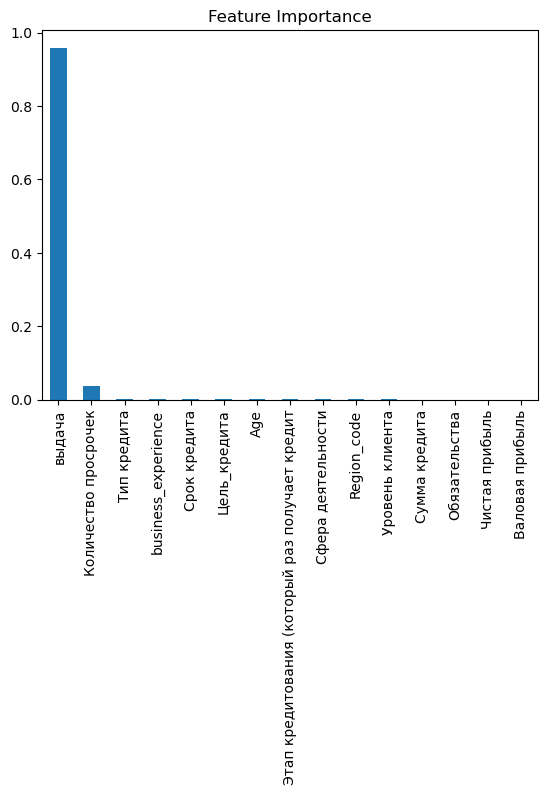

In [188]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

y = data2['Дни просрочки']
X = data2.drop(['Дни просрочки'], axis=1)

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Инициализация и обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Важность признаков - абсолютные значения коэффициентов
feature_importance = pd.Series(abs(model.coef_), index=X.columns)
feature_importance = feature_importance / feature_importance.sum()  # Нормализация для получения доли важности
print(feature_importance)

# Визуализация важности признаков
feature_importance.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importance')
plt.show()


   Выдача (выдача): Этот признак имеет наибольшую важность (вес 0.959), что означает его существенный вклад в предсказания модели. Это может быть ключевым фактором для определения дней просрочки.

   Количество просрочек (Количество просрочек): Также важный признак с весом 0.036, что указывает на его значительное влияние на прогнозы.

   Тип кредита (Тип кредита): Имеет важность 0.002, что также делает его относительно значимым.

   Также заметные признаки: Срок кредита, Цель кредита, business_experience, Age также имеют значительные веса.

   Малозначимые признаки: Валовая прибыль, Чистая прибыль, Обязательства и другие признаки имеют более низкие веса, что означает, что они вносят менее существенный вклад в прогнозы.

In [189]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Разделите данные на тренировочный и тестовый наборы
X_reg = data2.drop('Дни просрочки', axis=1)
y_reg = data2['Дни просрочки']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

# Обучение модели линейной регрессии
model_reg = LinearRegression()
model_reg.fit(X_train_reg, y_train_reg)

# Предсказание на тестовом наборе
y_pred_reg = model_reg.predict(X_test_reg)

# Оценка качества модели
mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Веса признаков
feature_weights = dict(zip(data2.drop('Дни просрочки', axis=1), model_reg.coef_))
print('Веса признаков:', feature_weights)


Mean Squared Error: 681.7756357700979
R^2 Score: 0.7104583214359044
Веса признаков: {'Сумма кредита': 0.00014018864004987488, 'Срок кредита': -0.10827777862120767, 'Обязательства': 5.292304419822796e-05, 'Количество просрочек': 10.118805113957745, 'Этап кредитования (который раз получает кредит': 0.06993781358612579, 'Валовая прибыль': 8.357862611711844e-06, 'Чистая прибыль': -2.5913796878888293e-05, 'Age': 0.0742070487482172, 'Region_code': -0.02685320319816143, 'Уровень клиента': 0.026672494468050045, 'Цель_кредита': -0.09626418267513628, 'Тип кредита': -0.6447141753685321, 'Сфера деятельности': 0.04650430983001069, 'business_experience': -0.18261221886567458, 'выдача': -267.73668142908684}


Сумма кредита (Сумма кредита): Положительный вес указывает на положительную корреляцию между суммой кредита и днями просрочки. То есть, увеличение суммы кредита связано с увеличением дней просрочки.

Срок кредита (Срок кредита): Отрицательный вес указывает на отрицательную корреляцию. Увеличение срока кредита связано с уменьшением дней просрочки.

Обязательства (Обязательства): Положительный вес указывает на положительную корреляцию. Увеличение обязательств связано с увеличением дней просрочки.

Количество просрочек (Количество просрочек): Положительный вес указывает на положительную корреляцию. Увеличение количества просрочек связано с увеличением дней просрочки.

Этап кредитования (который раз получает кредит): Положительный вес указывает на положительную корреляцию. Количество раз, которое клиент получает кредит, связано с увеличением дней просрочки.

Валовая прибыль (Валовая прибыль): Положительный вес указывает на положительную корреляцию. Увеличение валовой прибыли связано с увеличением дней просрочки.

Чистая прибыль (Чистая прибыль): Отрицательный вес указывает на отрицательную корреляцию. Увеличение чистой прибыли связано с уменьшением дней просрочки.

Age (Возраст): Положительный вес указывает на положительную корреляцию. Более старший возраст связан с увеличением дней просрочки.

Region_code (Регион): Отрицательный вес указывает на отрицательную корреляцию. Больший код региона связан с уменьшением дней просрочки.

Уровень клиента (Уровень клиента): Положительный вес указывает на положительную корреляцию. Более высокий уровень клиента связан с увеличением дней просрочки.

Цель_кредита (Цель кредита): Отрицательный вес указывает на отрицательную корреляцию. Определенные цели кредита связаны с уменьшением дней просрочки.

Тип кредита (Тип кредита): Отрицательный вес указывает на отрицательную корреляцию. Определенный тип кредита связан с уменьшением дней просрочки.

Сфера деятельности (Сфера деятельности): Положительный вес указывает на положительную корреляцию. Определенная сфера деятельности связана с увеличением дней просрочки.

business_experience (Опыт бизнеса): Отрицательный вес указывает на отрицательную корреляцию. Больший опыт бизнеса связан с уменьшением дней просрочки.

выдача (выдача): Отрицательный вес указывает на отрицательную корреляцию. Большая выдача связана с уменьшением дней просрочки.

In [190]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = data2.drop(['Дни просрочки'], axis=1)
X_with_const = pd.concat([pd.Series(1, index=X.index, name='const'), X], axis=1)
vif_data = pd.DataFrame()
vif_data["Признак"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]
print('\nVIF:')
print(vif_data)


VIF:
                                           Признак         VIF
0                                            const  155.792053
1                                    Сумма кредита    1.319629
2                                     Срок кредита    1.527829
3                                    Обязательства    1.128810
4                             Количество просрочек    1.135378
5   Этап кредитования (который раз получает кредит    1.652494
6                                  Валовая прибыль    1.957231
7                                   Чистая прибыль    2.037598
8                                              Age    1.260975
9                                      Region_code    1.029725
10                                 Уровень клиента    1.731265
11                                    Цель_кредита    1.521952
12                                     Тип кредита    1.325305
13                              Сфера деятельности    1.731524
14                             business_experienc

In [191]:
#В конечном итоге выбираем только следующие переменные:
data3 = data1.drop(['Сред_просрочки','Обязательства','Сфера деятельности','Тип кредита','Уровень клиента'], axis=1)

## Линейная регрессия, МНК 

In [192]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y = data3['Дни просрочки']
X = data3.drop(['Дни просрочки'], axis=1)

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Инициализация модели линейной регрессии
linreg = LinearRegression()

# Обучение модели
linreg.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = linreg.predict(X_test)

# Оценка качества модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Вывод результатов
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
print('Коэффициенты регрессии:')
for feature, coef in zip(X.columns, model.coef_):
    print(f'{feature}: {coef}')

Mean Squared Error: 1064.3080796436043
R^2 Score: 0.5480015246639678
Коэффициенты регрессии:
Сумма кредита: 0.00014018864004987488
Срок кредита: -0.10827777862120767
Количество просрочек: 5.292304419822796e-05
Этап кредитования (который раз получает кредит: 10.118805113957745
Валовая прибыль: 0.06993781358612579
Чистая прибыль: 8.357862611711844e-06
Age: -2.5913796878888293e-05
Region_code: 0.0742070487482172
Цель_кредита: -0.02685320319816143
business_experience: 0.026672494468050045
выдача: -0.09626418267513628


   Mean Squared Error (MSE): 1064.3 - это среднеквадратичная ошибка, которая измеряет разницу между фактическими значениями и предсказанными значениями.

   R^2 Score:0.5480086594615827 - это коэффициент детерминации, который представляет собой долю объясненной дисперсии в общей дисперсии данных. Значение 0.548 говорит о том, что модель объясняет примерно 54.8% изменчивости в данных, что можно считать умеренным результатом.

   Коэффициенты регрессии: Они предоставляют информацию о весах, с которыми каждый из признаков влияет на целевую переменную. Например, "Количество просрочек" имеет положительный вес 5.29, что означает сильное влияние на увеличение "Дни просрочек". "Срок кредита" имеет отрицательный вес (-0.108), что может указывать на то, что увеличение срока кредита связано с уменьшением "Дни просрочек".

## Случайный лес

In [193]:
from sklearn.ensemble import RandomForestRegressor

# Инициализация и обучение модели случайного леса
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred_rf = model_rf.predict(X_test)

# Оценка качества модели
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Вывод результатов
print(f'Mean Squared Error (Random Forest): {mse_rf}')
print(f'R^2 Score (Random Forest): {r2_rf}')


Mean Squared Error (Random Forest): 864.785080999845
R^2 Score (Random Forest): 0.632736473976437


   Mean Squared Error (MSE): 864.785 - уменьшился по сравнению с результатами линейной регрессии, что указывает на лучшую точность предсказаний модели.

   R^2 Score (Random Forest):0.6327 - увеличился по сравнению с линейной регрессией, что также говорит о более хорошем объяснении изменчивости в данных.

## GradientBoost

In [194]:
from sklearn.ensemble import GradientBoostingRegressor

# Инициализация и обучение модели градиентного бустинга
model_gb = GradientBoostingRegressor()
model_gb.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred_gb = model_gb.predict(X_test)

# Оценка качества модели
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# Вывод результатов
print(f'Mean Squared Error (Gradient Boosting): {mse_gb}')
print(f'R^2 Score (Gradient Boosting): {r2_gb}')


Mean Squared Error (Gradient Boosting): 824.3695095969539
R^2 Score (Gradient Boosting): 0.6499004671879314


   Mean Squared Error (MSE): 824.3695 - это ещё меньше, чем у Random Forest, что указывает на то, что Gradient Boosting справился с предсказаниями еще лучше.

   R^2 Score (Gradient Boosting):  0.6499 - также увеличился по сравнению с Random Forest, что свидетельствует о том, что Gradient Boosting лучше объясняет изменчивость в данных.

In [195]:
#Сохраняем модель градиентного бустинга в пикл файл
with open('model_gb.pkl', 'wb') as file:
    pickle.dump(model_gb, file)

Как итог можно увидеть, что лучший результат по задаче классификации выдали модели логической регрессии, Дерево решений и KNN в трешхолде 0 дней с очень высокими Accuracy и AUC у моделей логической регрессии(Accuracy = 0,99, AUC=0,99), Дерево решений(Accuracy: 1, AUC: 1) и средними у модели KNN(Accuracy: 0,58; AUC:0,63). Но так как при трешхолде 0 дней все будет зависет в основном от дня просрочек, т.е. если все переменные хорошие и у клиента будет хотя бы 1 день просрочек - ему не выдадут кредит, поэтому в качестве оптимального трешхолда возьмём 20 дней с этими же моделями, так как они и в данном интервале дают хороший результат: Accuracy у всех 0.99, у KNN 0.97, а AUC 0.97, 0.99, 0.73 соответственно у логической регресси, Дерево решений, KNN

# 5) Если клиенту отказывается в кредите, то в какую сумму кредить выдавать?
# 6) Модель не только должна сказать выдать или не выдать, но и вероятность возврата в процентах

Для решения данной задачи нам нужно сделать регрессию суммы кредита только в случаях, когда значение в столбце "выдача" равно 0, то есть когда кредит не выдаётся.

In [196]:
data3 = data1.drop(['Сред_просрочки','Обязательства','Сфера деятельности','Тип кредита','Уровень клиента'], axis=1)

In [197]:
data3.loc[data1['Сред_просрочки']<=20, 'выдача']=1
data3.loc[data1['Сред_просрочки']>20, 'выдача']=0

In [198]:
data3

,Сумма кредита,Срок кредита,Дни просрочки,Количество просрочек,Этап кредитования (который раз получает кредит,Валовая прибыль,Чистая прибыль,Age,Region_code,Цель_кредита,business_experience,выдача
0,6793.20,12,46,4,1,0.0,180.0,39,0,0,2,1.0
1,1000.00,12,11,5,1,0.0,0.0,80,1,1,1,1.0
2,7600.00,12,0,0,2,0.0,1648.0,82,1,2,1,1.0
3,1500.00,12,0,0,1,0.0,150.0,80,0,0,0,1.0
4,2500.00,12,15,2,2,0.0,280.0,75,2,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
85417,5000.00,12,53,6,1,2500.0,2683.0,31,35,0,1,1.0
85418,9510.48,24,0,0,1,7360.0,6536.0,25,3,4,1,1.0
85419,30000.00,36,0,0,1,5630.0,6043.0,41,37,2,1,1.0
85420,3000.00,12,2,2,1,0.0,780.0,30,23,0,0,1.0


In [199]:
from sklearn.ensemble import GradientBoostingRegressor

X_regression = data3[data3['выдача'] == 0].drop(['Сумма кредита'], axis=1)
y_regression = data3[data3['выдача'] == 0]['Сумма кредита']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)

model_regression = GradientBoostingRegressor()
model_regression.fit(X_train_reg, y_train_reg)

y_pred_reg = model_regression.predict(X_test_reg)

In [200]:
#Сохраняем модель градиентного бустинга в пикл файл
with open('model_gb2.pkl', 'wb') as file:
    pickle.dump(model_regression, file)

In [201]:
#Объединяем все три модели для более правильного ответа
with open('lr_model2.pkl', 'rb') as file:
    lr_model = pickle.load(file)
with open('model_gb.pkl', 'rb') as file:
    model_gb = pickle.load(file)
new_data = [[56827.648505155965, 12, 46, 2, 1, 0, 180, 39, 0, 0, 2]]
prediction_class = lr_model.predict(new_data)
new_data2 = [[6793.20, 12, 4, 1, 0, 180, 39, 0, 0, 2, 1]]
prediction_class2 = model_gb.predict(new_data2)
#Вероятность того, что клиент вернет кредит вовремя
new_data_proba = lr_model.predict_proba(new_data)[:, 1]
print(f'Сколько примерно дней просрочит: {prediction_class2[0].astype(int)}')
print(f'Вероятность возврата кредита: {(new_data_proba[0]*100).astype(int)}')
print(f'Вероятность выдачи кредита: {prediction_class[0]*100}')
if prediction_class[0] == 0:  # Если предсказание "нет"
    prediction_sum = model_regression.predict(new_data)
    print(f'Сумма кредита в случае отказа: {prediction_sum[0]}')
else:
    print('Кредит будет выдан.')

Сколько примерно дней просрочит: 22
Вероятность возврата кредита: 97
Вероятность выдачи кредита: 100.0
Кредит будет выдан.


C:\Users\extre\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\extre\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\extre\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [202]:
data3.columns

Index(['Сумма кредита', 'Срок кредита', 'Дни просрочки',
       'Количество просрочек',
       'Этап кредитования (который раз получает кредит', 'Валовая прибыль',
       'Чистая прибыль', 'Age', 'Region_code', 'Цель_кредита',
       'business_experience', 'выдача'],
      dtype='object')